# 读取`MEIC`清单2017年数据，比较月份差异

In [10]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import fnmatch
import cmaps

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [43]:
import shapely.geometry as sgeom
from shapely.prepared import prep

def polygon_to_mask(polygon, x, y):
    '''生成落入多边形的点的掩膜数组.'''
    x = np.atleast_1d(x)
    y = np.atleast_1d(y)
    mask = np.zeros(x.shape, dtype=bool)

    # 判断每个点是否落入polygon, 不包含边界.
    prepared = prep(polygon)
    for index in np.ndindex(x.shape):
        point = sgeom.Point(x[index], y[index])
        if prepared.contains(point):
            mask[index] = True

    return mask

In [9]:
def read_and_sum_files(folder_path, keyword):
    """
    读取所有名称为“2017_00_**_*.asc”的文件，并将这些 DataFrame 的值相加得到一个新的 DataFrame。
    :param folder_path: 文件夹路径
    :param keyword: 匹配文件名中的关键字（不同种类的污染物）
    :return: DataFrame 对象，包含所有文件数据的总和
    """
    
    # 找到所有符合条件的文件
    pattern = f"2017_00_*_{keyword}.asc"
    file_list = fnmatch.filter(os.listdir(folder_path), pattern)

    # 读取所有文件的数据，并进行相加
    df_sum = None
    for filename in file_list:
        file_path = os.path.join(folder_path, filename)
        #读取元信息
        meta=pd.read_csv(file_path,delim_whitespace=True,header=None,nrows=6)
        NODATA_value = meta.iloc[5,1]
        
        df = pd.read_csv(file_path, skiprows=6, header=None, delim_whitespace=True, na_values=NODATA_value)
        if df_sum is None:
            df_sum = df
        else:
            df_sum = df_sum + df

    return df_sum

In [39]:
# 数据设置
ncols = 320
nrows = 200
xllcorner = 70
yllcorner = 10
cellsize = 0.25

# 创建X和Y坐标数组
x = np.arange(xllcorner, xllcorner + ncols*cellsize, cellsize)
y = np.arange(yllcorner + nrows*cellsize, yllcorner, -cellsize)

# 创建网格数据
lon, lat = np.meshgrid(x[180:193], y[-86:-76])

In [57]:
lon

array([[115.  , 115.25, 115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75,
        117.  , 117.25, 117.5 , 117.75, 118.  ],
       [115.  , 115.25, 115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75,
        117.  , 117.25, 117.5 , 117.75, 118.  ],
       [115.  , 115.25, 115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75,
        117.  , 117.25, 117.5 , 117.75, 118.  ],
       [115.  , 115.25, 115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75,
        117.  , 117.25, 117.5 , 117.75, 118.  ],
       [115.  , 115.25, 115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75,
        117.  , 117.25, 117.5 , 117.75, 118.  ],
       [115.  , 115.25, 115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75,
        117.  , 117.25, 117.5 , 117.75, 118.  ],
       [115.  , 115.25, 115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75,
        117.  , 117.25, 117.5 , 117.75, 118.  ],
       [115.  , 115.25, 115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75,
        117.  , 117.25, 117.5 , 117.75, 118.  ],
       [115.  , 115.25, 115.5 , 

In [58]:
lat

array([[31.5 , 31.5 , 31.5 , 31.5 , 31.5 , 31.5 , 31.5 , 31.5 , 31.5 ,
        31.5 , 31.5 , 31.5 , 31.5 ],
       [31.25, 31.25, 31.25, 31.25, 31.25, 31.25, 31.25, 31.25, 31.25,
        31.25, 31.25, 31.25, 31.25],
       [31.  , 31.  , 31.  , 31.  , 31.  , 31.  , 31.  , 31.  , 31.  ,
        31.  , 31.  , 31.  , 31.  ],
       [30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75,
        30.75, 30.75, 30.75, 30.75],
       [30.5 , 30.5 , 30.5 , 30.5 , 30.5 , 30.5 , 30.5 , 30.5 , 30.5 ,
        30.5 , 30.5 , 30.5 , 30.5 ],
       [30.25, 30.25, 30.25, 30.25, 30.25, 30.25, 30.25, 30.25, 30.25,
        30.25, 30.25, 30.25, 30.25],
       [30.  , 30.  , 30.  , 30.  , 30.  , 30.  , 30.  , 30.  , 30.  ,
        30.  , 30.  , 30.  , 30.  ],
       [29.75, 29.75, 29.75, 29.75, 29.75, 29.75, 29.75, 29.75, 29.75,
        29.75, 29.75, 29.75, 29.75],
       [29.5 , 29.5 , 29.5 , 29.5 , 29.5 , 29.5 , 29.5 , 29.5 , 29.5 ,
        29.5 , 29.5 , 29.5 , 29.5 ],
       [29.25, 29.25, 29.25,

In [52]:
path='F:/Data/MEIC_2017_SAPRC07_0.25/'
df = pd.read_csv(path+'2017_00_power_PM25.asc', skiprows=6, header=None, delim_whitespace=True, na_values=-9999.0)
data=df.iloc[-86:-76,180:193]
data

,180,181,182,183,184,185,186,187,188,189,190,191,192
114,260.065950,0.000249,0.000014,0.000011,0.000046,0.000227,0.000047,0.000119,0.000101,0.000085,0.000113,0.000199,0.000155
115,0.001292,0.000686,0.000156,0.000085,0.000024,0.000024,0.000014,0.000085,0.000196,0.000096,0.000168,0.000154,810.456000
116,0.000636,0.000781,0.000727,0.000300,0.000030,0.000049,0.000075,0.000195,0.000166,0.000116,0.000169,2177.058800,0.000147
117,0.001905,0.001063,0.000719,0.000137,0.000015,0.000052,0.000166,245.224750,783.630550,1805.014200,0.000135,0.000091,0.000054
118,0.002816,0.001559,0.001144,0.000407,0.000027,0.000106,0.000105,0.000083,0.000086,0.000141,0.000020,0.000034,0.000077
119,1479.440000,0.001162,0.001221,0.000651,0.000199,0.000045,0.000061,0.000034,0.000052,0.000017,0.000015,0.000010,0.000019
120,0.001235,0.000712,196.041280,0.002452,0.000546,5.211903,0.000060,0.000017,0.000008,0.000020,0.000026,0.000045,0.000051
121,0.000475,0.000105,0.000119,0.000415,1381.789700,0.000110,0.000031,0.000026,0.000011,0.000015,0.000007,0.000007,0.000036
122,162.865700,0.000018,0.000066,0.000103,0.000028,0.000036,0.000033,0.000021,431.127350,0.000059,0.000015,0.000015,0.000006
123,0.000016,0.000006,0.000060,66.512550,0.000039,0.000005,0.000018,0.000034,481.581450,0.000038,0.000028,0.000015,0.000021


In [54]:
shp=gpd.read_file('F:/shp_for_ArcGis/安徽/安庆/Anqing.shp')

In [55]:
for i in range(np.size(lat,0)):
    for j in range(np.size(lat,1)):
        if polygon_to_mask(shp.geometry[0],lon[i,j],lat[i,j])==False:
            data[i,j]=np.nan # 将边界外的数值设为空值

In [56]:
data

,180,181,182,183,184,185,186,187,188,189,...,"(9, 3)","(9, 4)","(9, 5)","(9, 6)","(9, 7)","(9, 8)","(9, 9)","(9, 10)","(9, 11)","(9, 12)"
114,260.065950,0.000249,0.000014,0.000011,0.000046,0.000227,0.000047,0.000119,0.000101,0.000085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,0.001292,0.000686,0.000156,0.000085,0.000024,0.000024,0.000014,0.000085,0.000196,0.000096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,0.000636,0.000781,0.000727,0.000300,0.000030,0.000049,0.000075,0.000195,0.000166,0.000116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,0.001905,0.001063,0.000719,0.000137,0.000015,0.000052,0.000166,245.224750,783.630550,1805.014200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,0.002816,0.001559,0.001144,0.000407,0.000027,0.000106,0.000105,0.000083,0.000086,0.000141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,1479.440000,0.001162,0.001221,0.000651,0.000199,0.000045,0.000061,0.000034,0.000052,0.000017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,0.001235,0.000712,196.041280,0.002452,0.000546,5.211903,0.000060,0.000017,0.000008,0.000020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,0.000475,0.000105,0.000119,0.000415,1381.789700,0.000110,0.000031,0.000026,0.000011,0.000015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,162.865700,0.000018,0.000066,0.000103,0.000028,0.000036,0.000033,0.000021,431.127350,0.000059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,0.000016,0.000006,0.000060,66.512550,0.000039,0.000005,0.000018,0.000034,481.581450,0.000038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

In [65]:
emis=pd.read_excel('F:/Data/case_2022_08-10/emission/Emission_2017.xlsx',sheet_name=None)
emis.keys()

dict_keys(['SO2', 'NOx', 'CO', 'VOC', 'NH3', 'PM25', 'PM10', 'BC', 'OC'])

In [68]:
gp_SO2=emis['SO2'][['category','month','Guangdong']].groupby(['category'])
gp_NOx=emis['NOx'][['category','month','Guangdong']].groupby(['category'])
gp_CO=emis['CO'][['category','month','Guangdong']].groupby(['category'])
gp_VOC=emis['VOC'][['category','month','Guangdong']].groupby(['category'])
gp_NH3=emis['NH3'][['category','month','Guangdong']].groupby(['category'])
gp_PM25=emis['PM25'][['category','month','Guangdong']].groupby(['category'])
gp_PM10=emis['PM10'][['category','month','Guangdong']].groupby(['category'])
gp_BC=emis['BC'][['category','month','Guangdong']].groupby(['category'])
gp_OC=emis['SO2'][['category','month','Guangdong']].groupby(['category'])

# 绘图

In [28]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

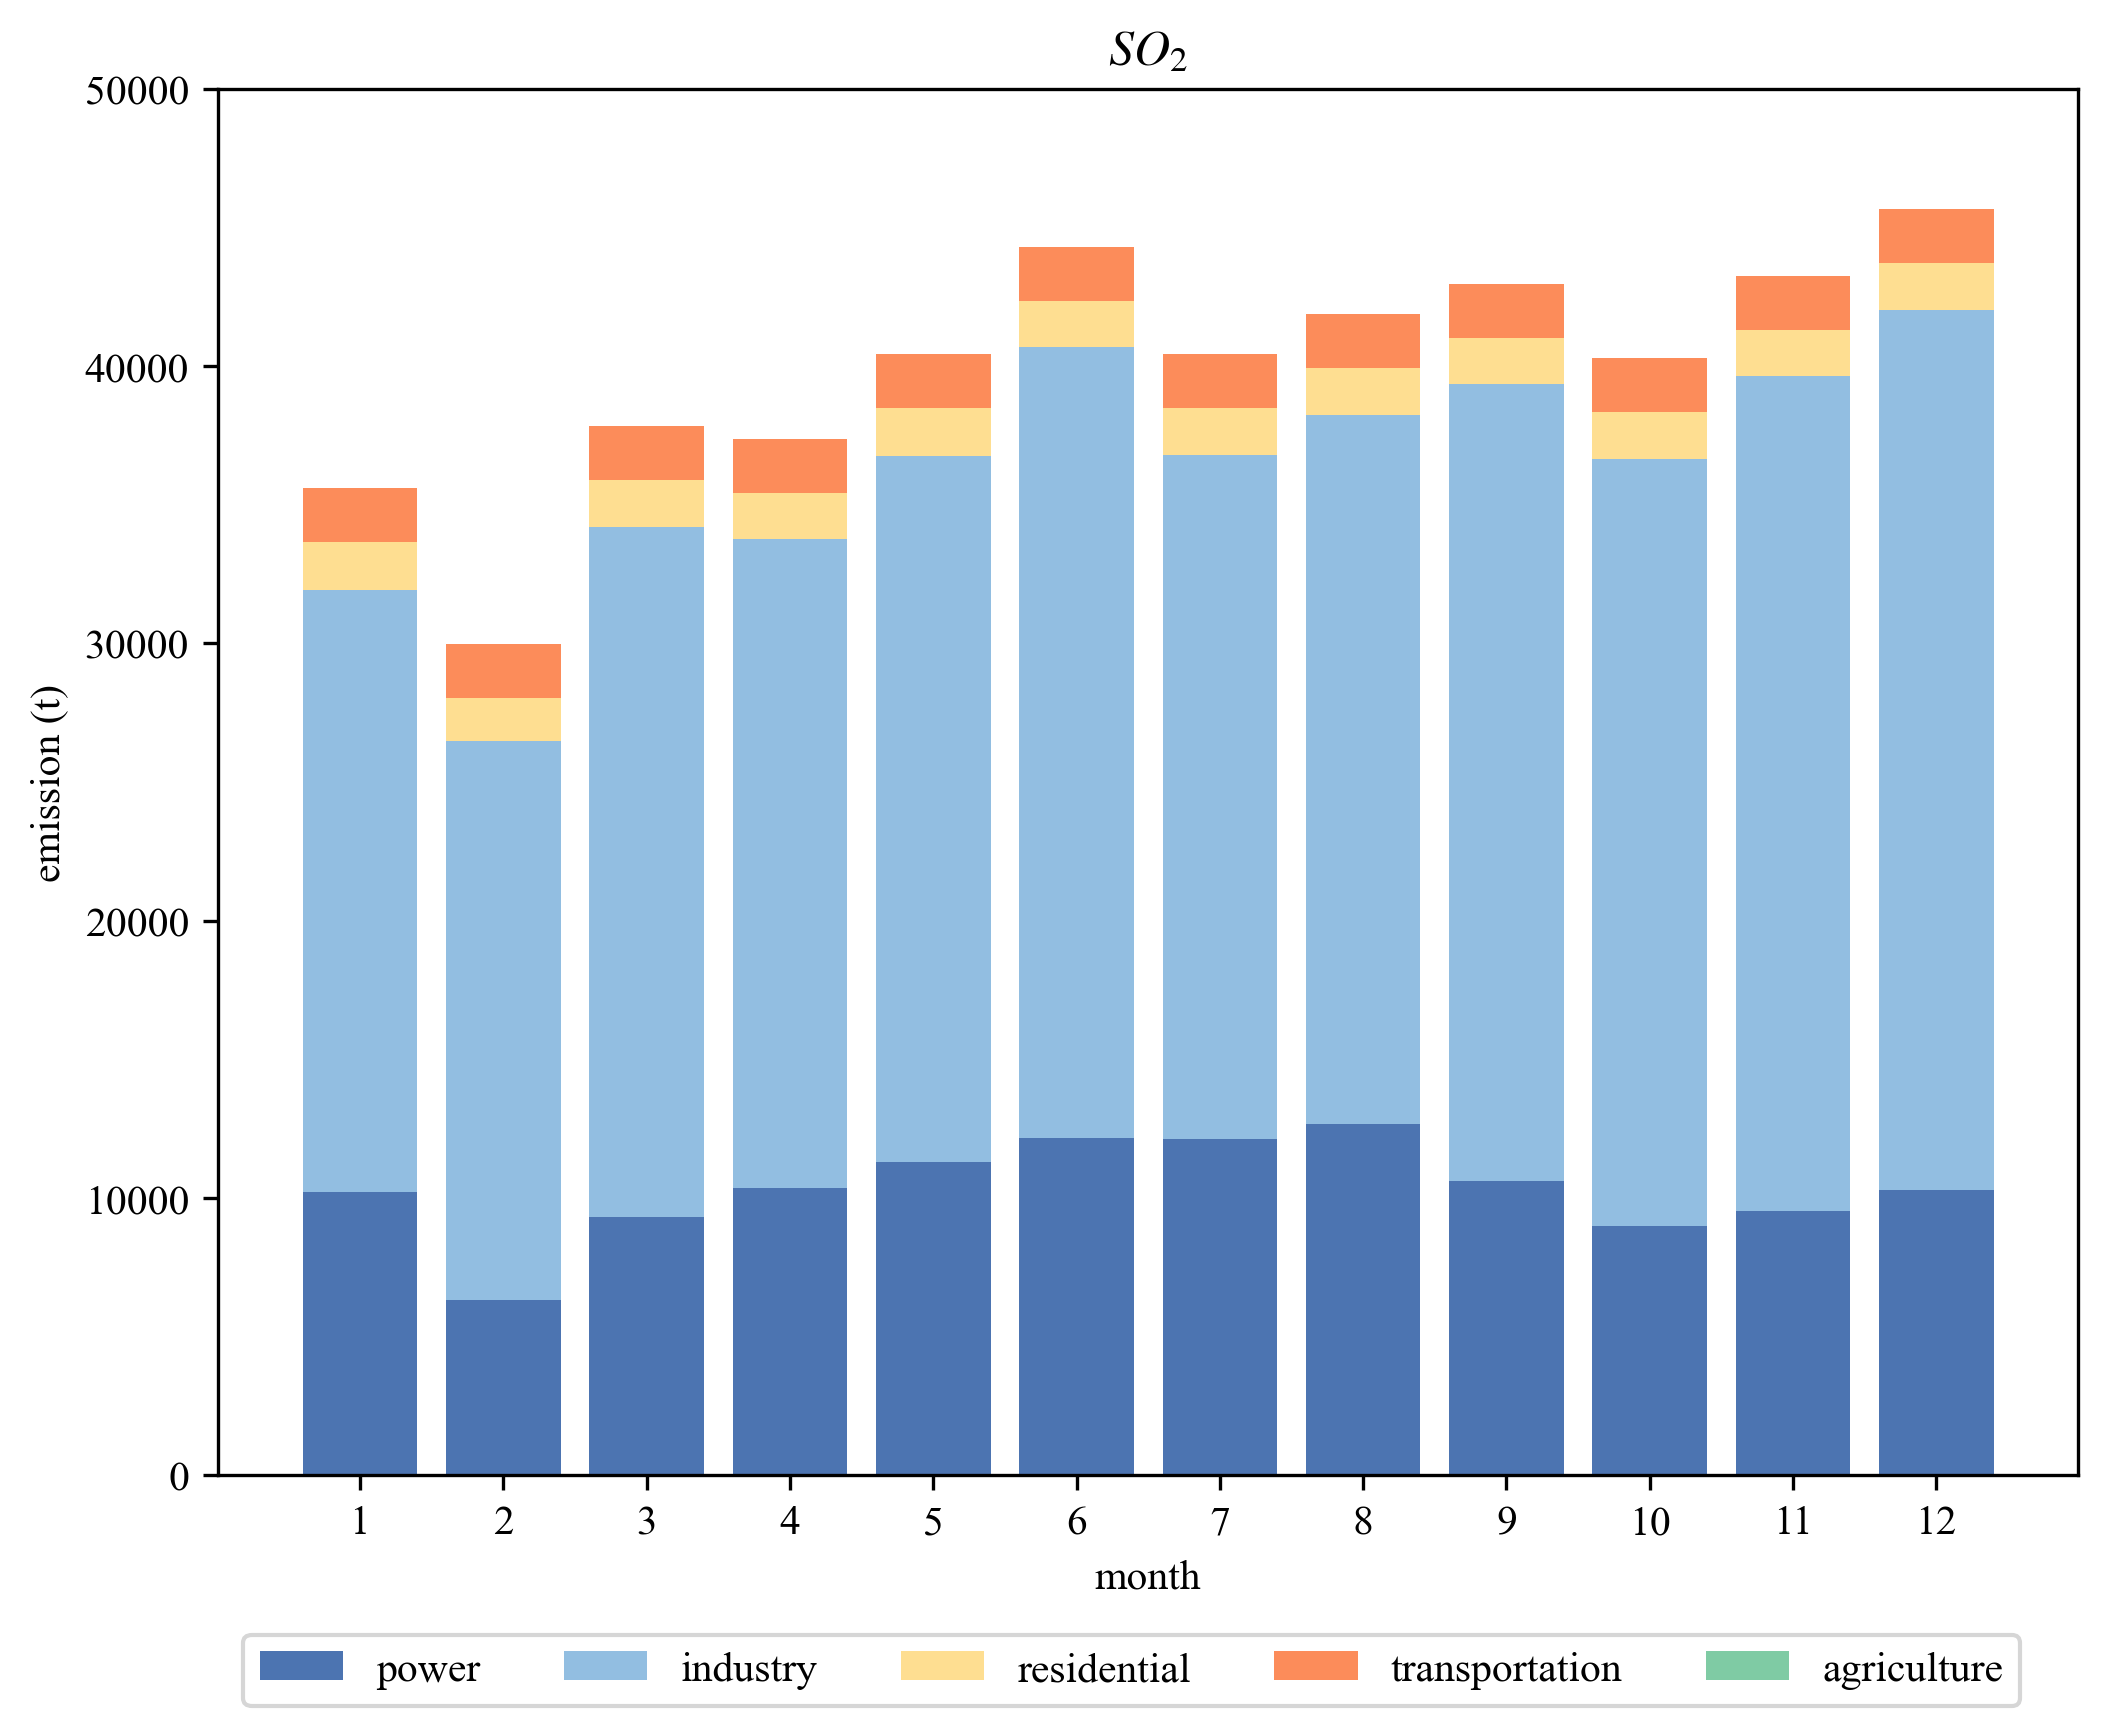

In [87]:
pow=np.array(gp_SO2.get_group('power')['Guangdong'])
ind=np.array(gp_SO2.get_group('industry')['Guangdong'])
res=np.array(gp_SO2.get_group('residential')['Guangdong'])
tra=np.array(gp_SO2.get_group('transportation')['Guangdong'])
agr=np.array(gp_SO2.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,50000)
ax.set_title('$SO_2$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()

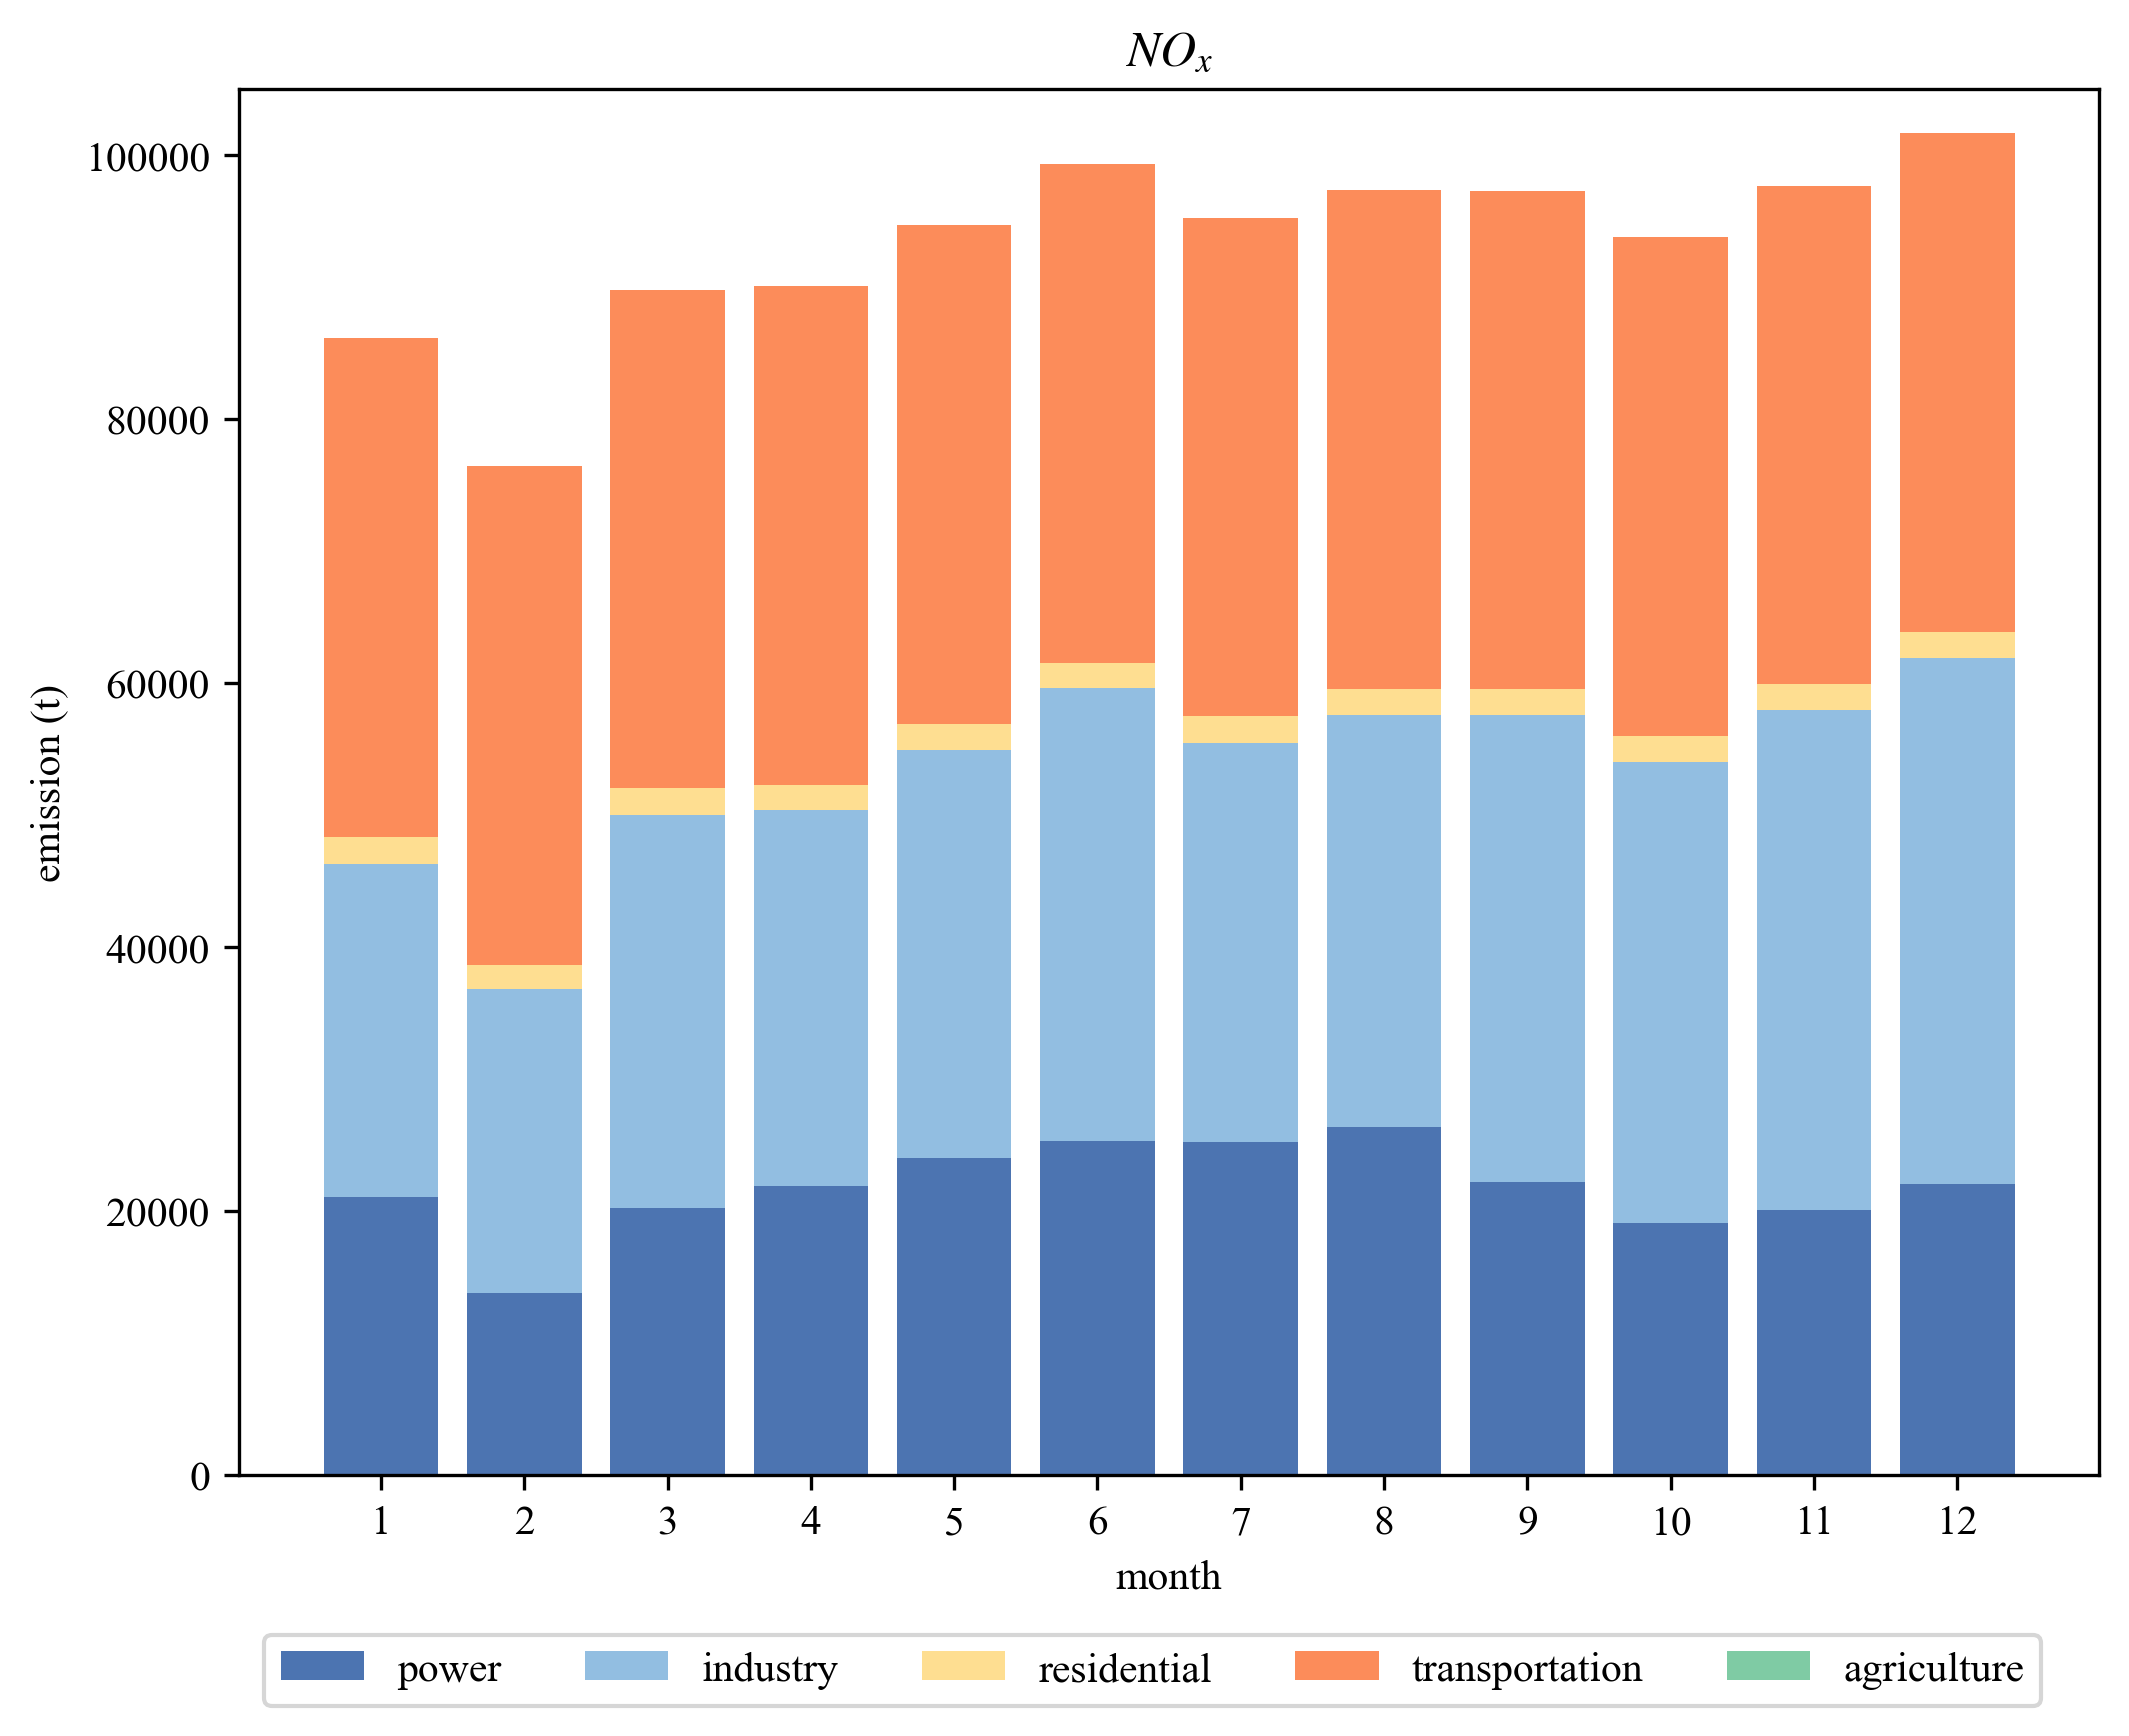

In [88]:
pow=np.array(gp_NOx.get_group('power')['Guangdong'])
ind=np.array(gp_NOx.get_group('industry')['Guangdong'])
res=np.array(gp_NOx.get_group('residential')['Guangdong'])
tra=np.array(gp_NOx.get_group('transportation')['Guangdong'])
agr=np.array(gp_NOx.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,105000)
ax.set_title('$NO_x$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()

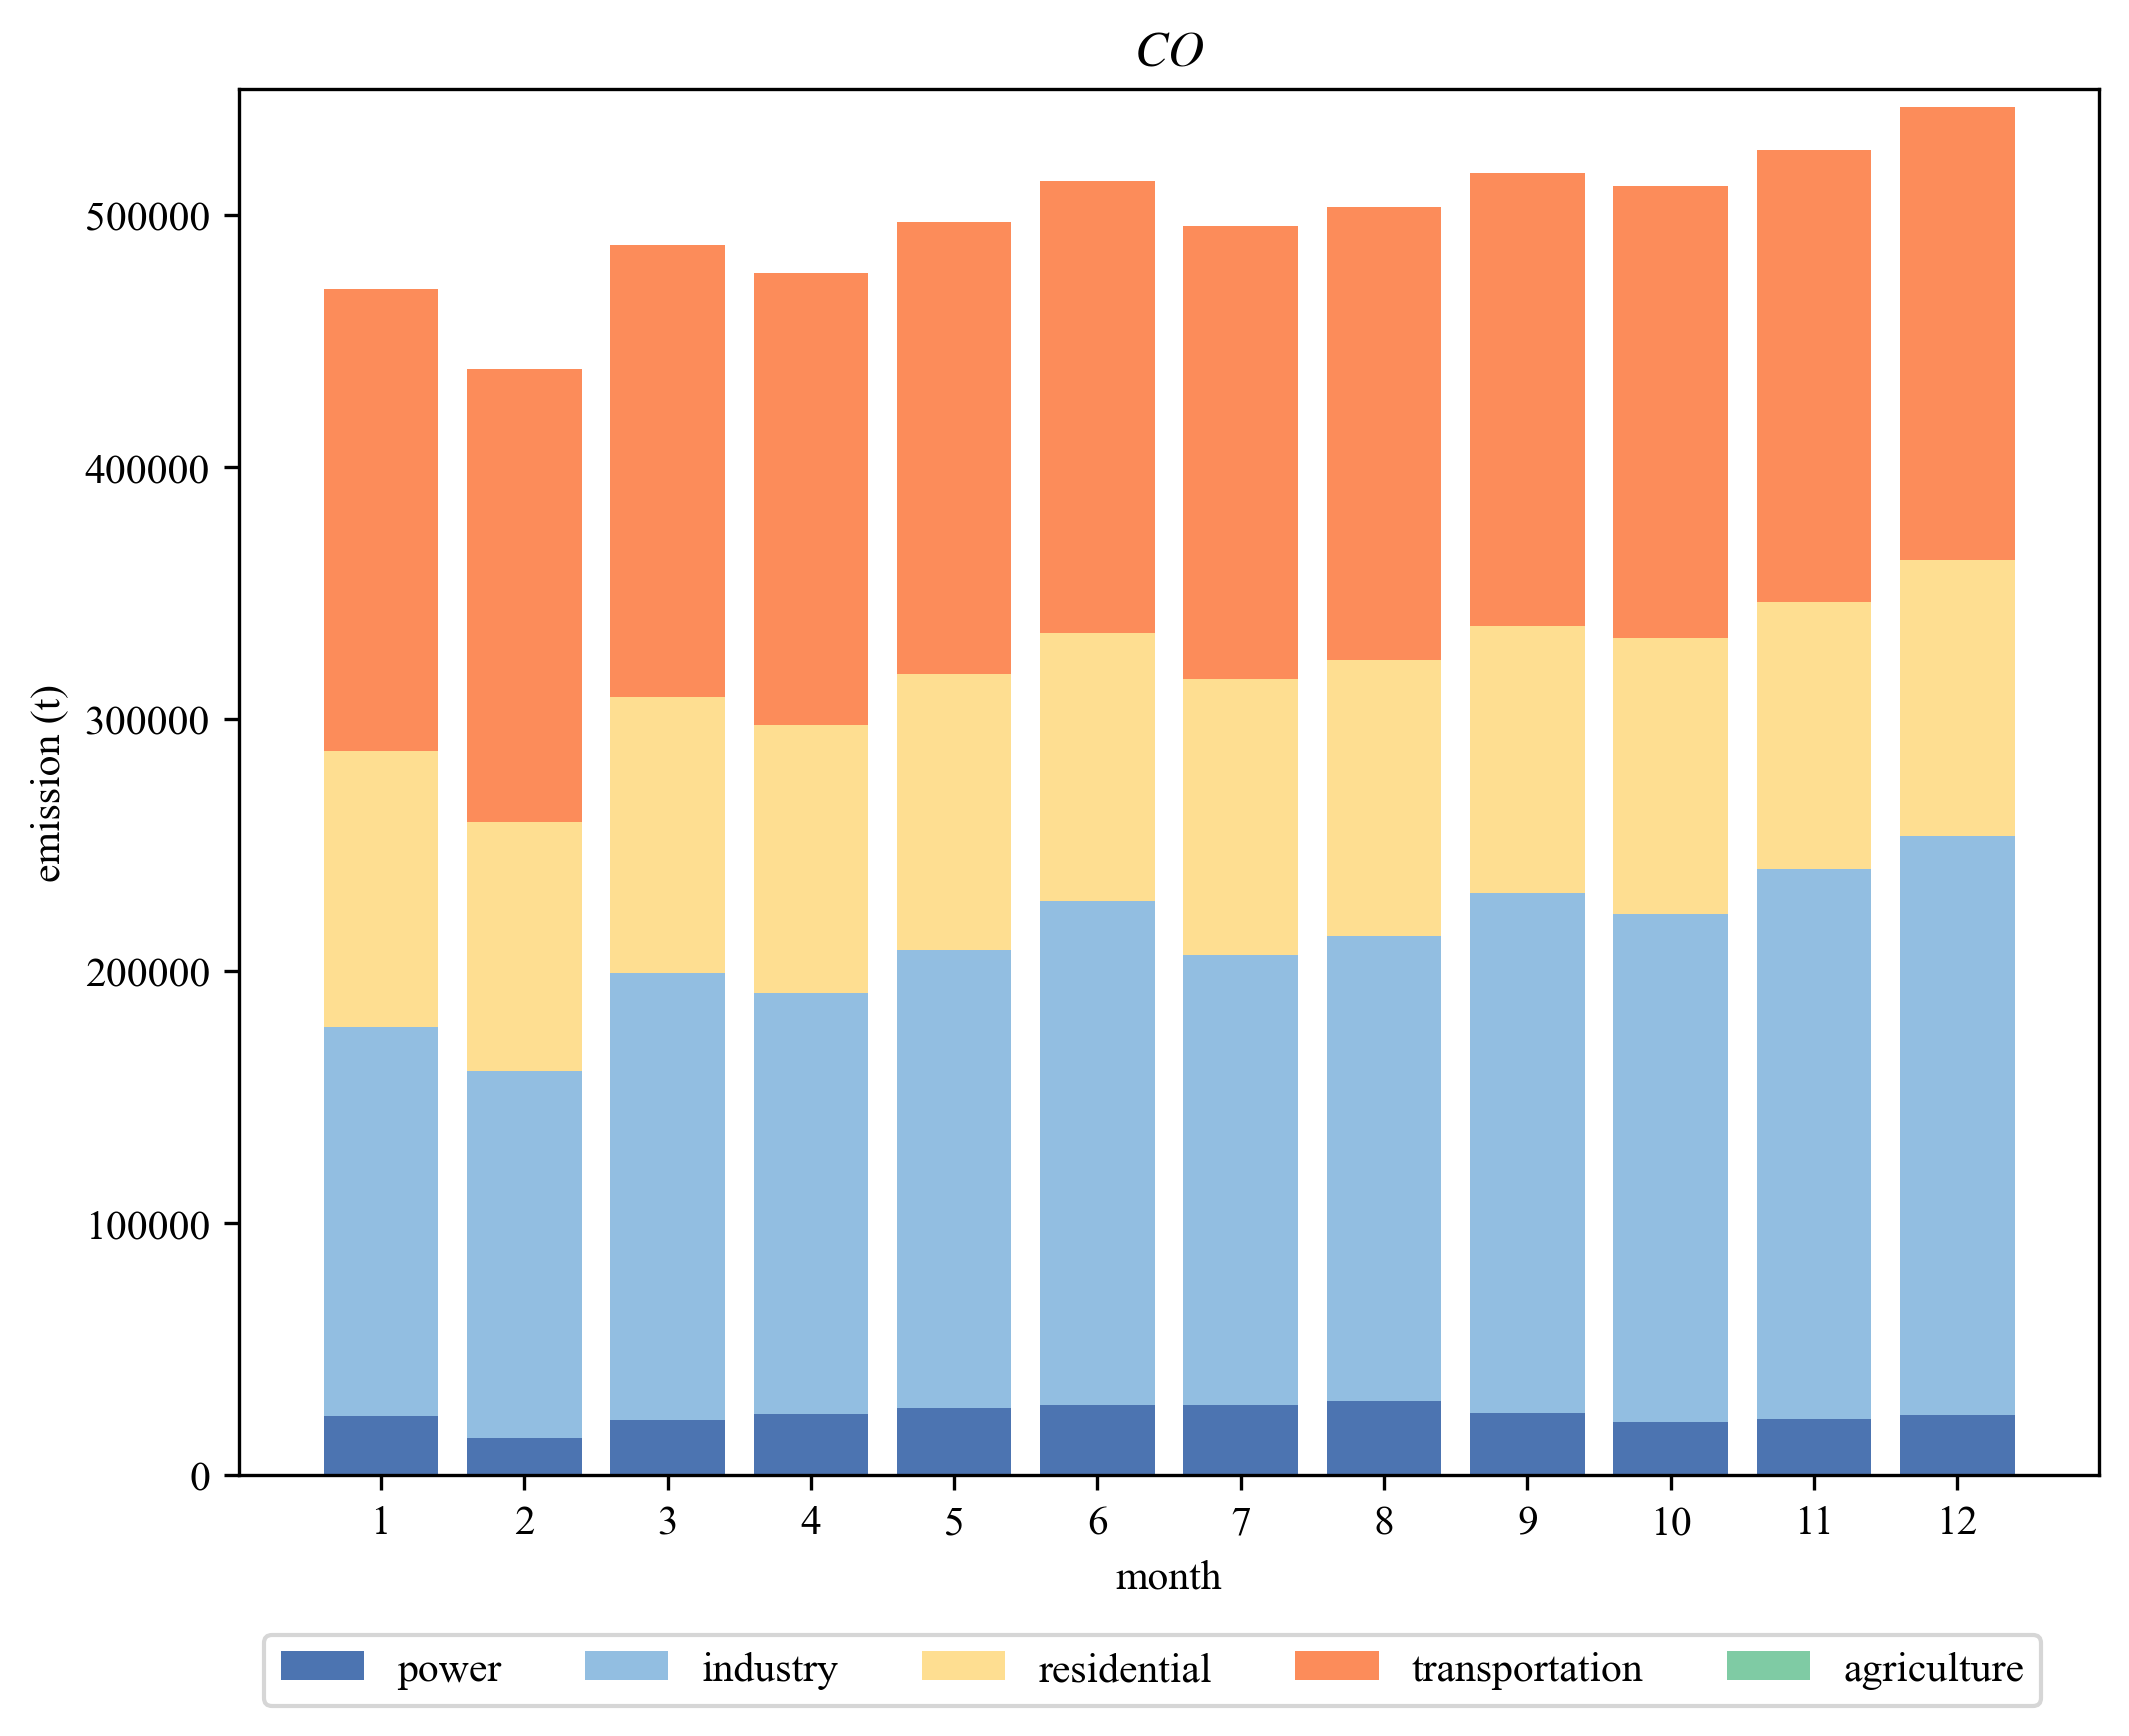

In [86]:
pow=np.array(gp_CO.get_group('power')['Guangdong'])
ind=np.array(gp_CO.get_group('industry')['Guangdong'])
res=np.array(gp_CO.get_group('residential')['Guangdong'])
tra=np.array(gp_CO.get_group('transportation')['Guangdong'])
agr=np.array(gp_CO.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,550000)
ax.set_title('$CO$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()

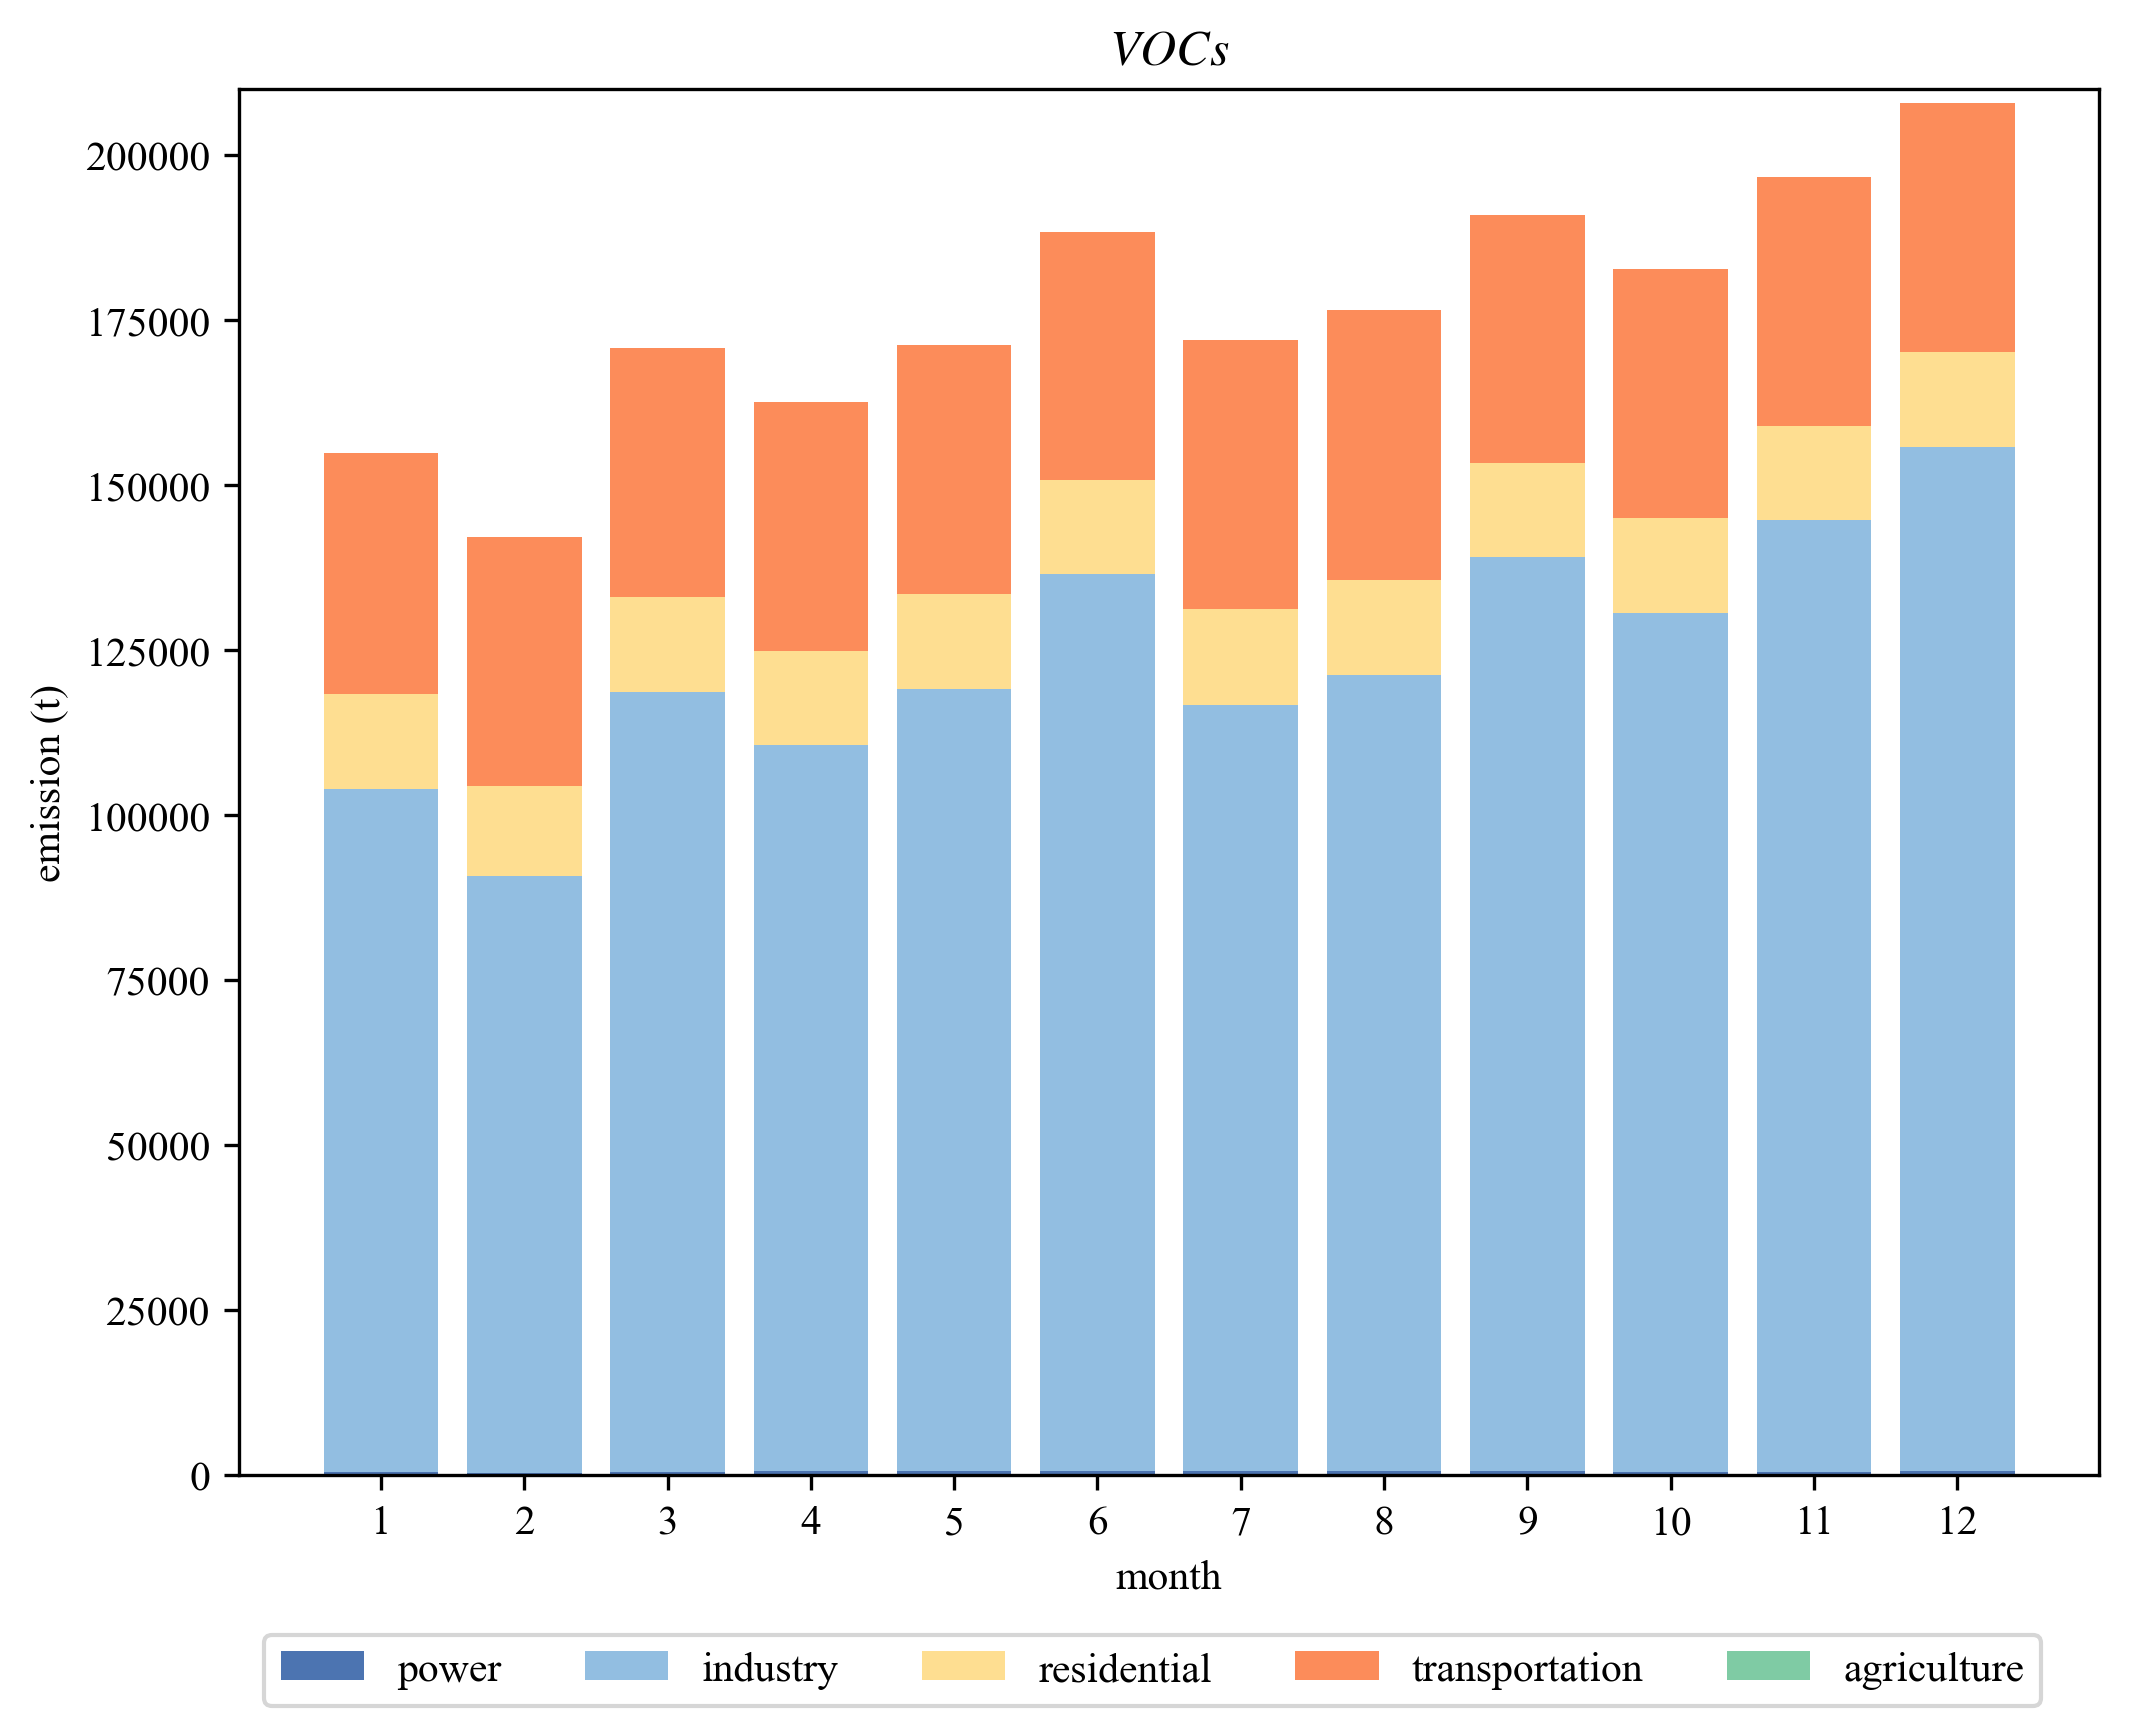

In [92]:
pow=np.array(gp_VOC.get_group('power')['Guangdong'])
ind=np.array(gp_VOC.get_group('industry')['Guangdong'])
res=np.array(gp_VOC.get_group('residential')['Guangdong'])
tra=np.array(gp_VOC.get_group('transportation')['Guangdong'])
agr=np.array(gp_VOC.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,210000)
ax.set_title('$VOCs$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()

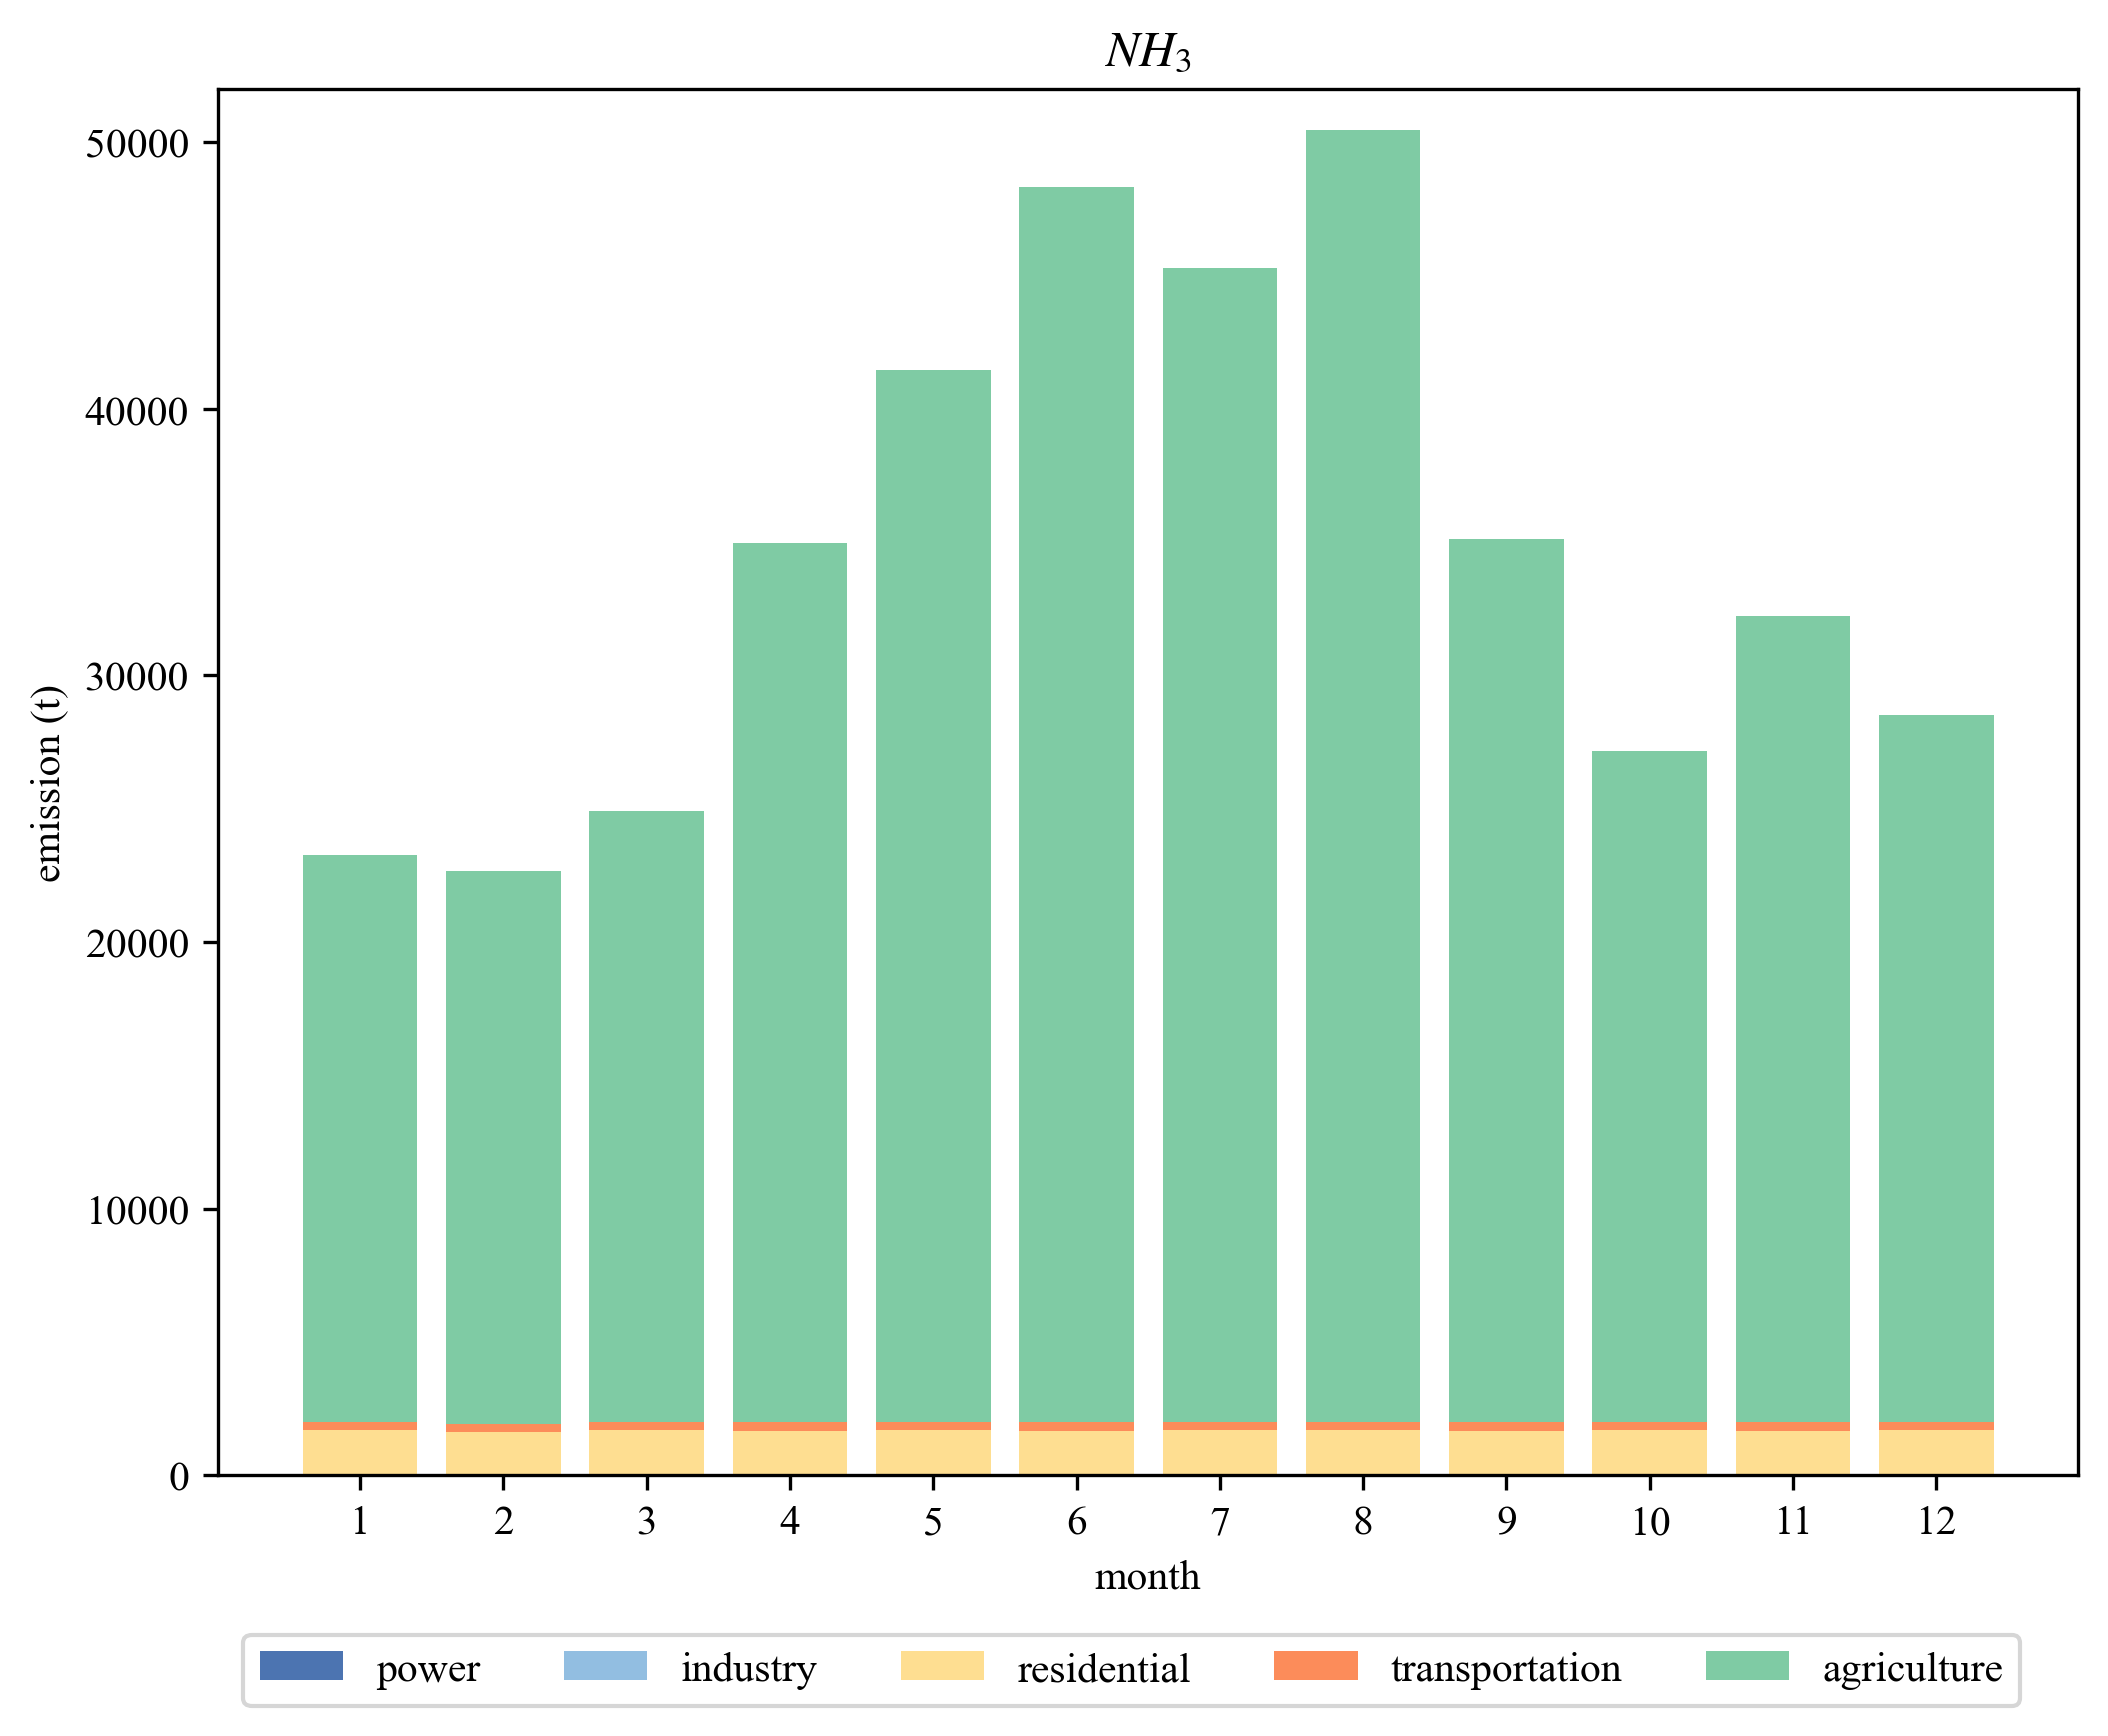

In [97]:
pow=np.array(gp_NH3.get_group('power')['Guangdong'])
ind=np.array(gp_NH3.get_group('industry')['Guangdong'])
res=np.array(gp_NH3.get_group('residential')['Guangdong'])
tra=np.array(gp_NH3.get_group('transportation')['Guangdong'])
agr=np.array(gp_NH3.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,52000)
ax.set_title('$NH_3$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()

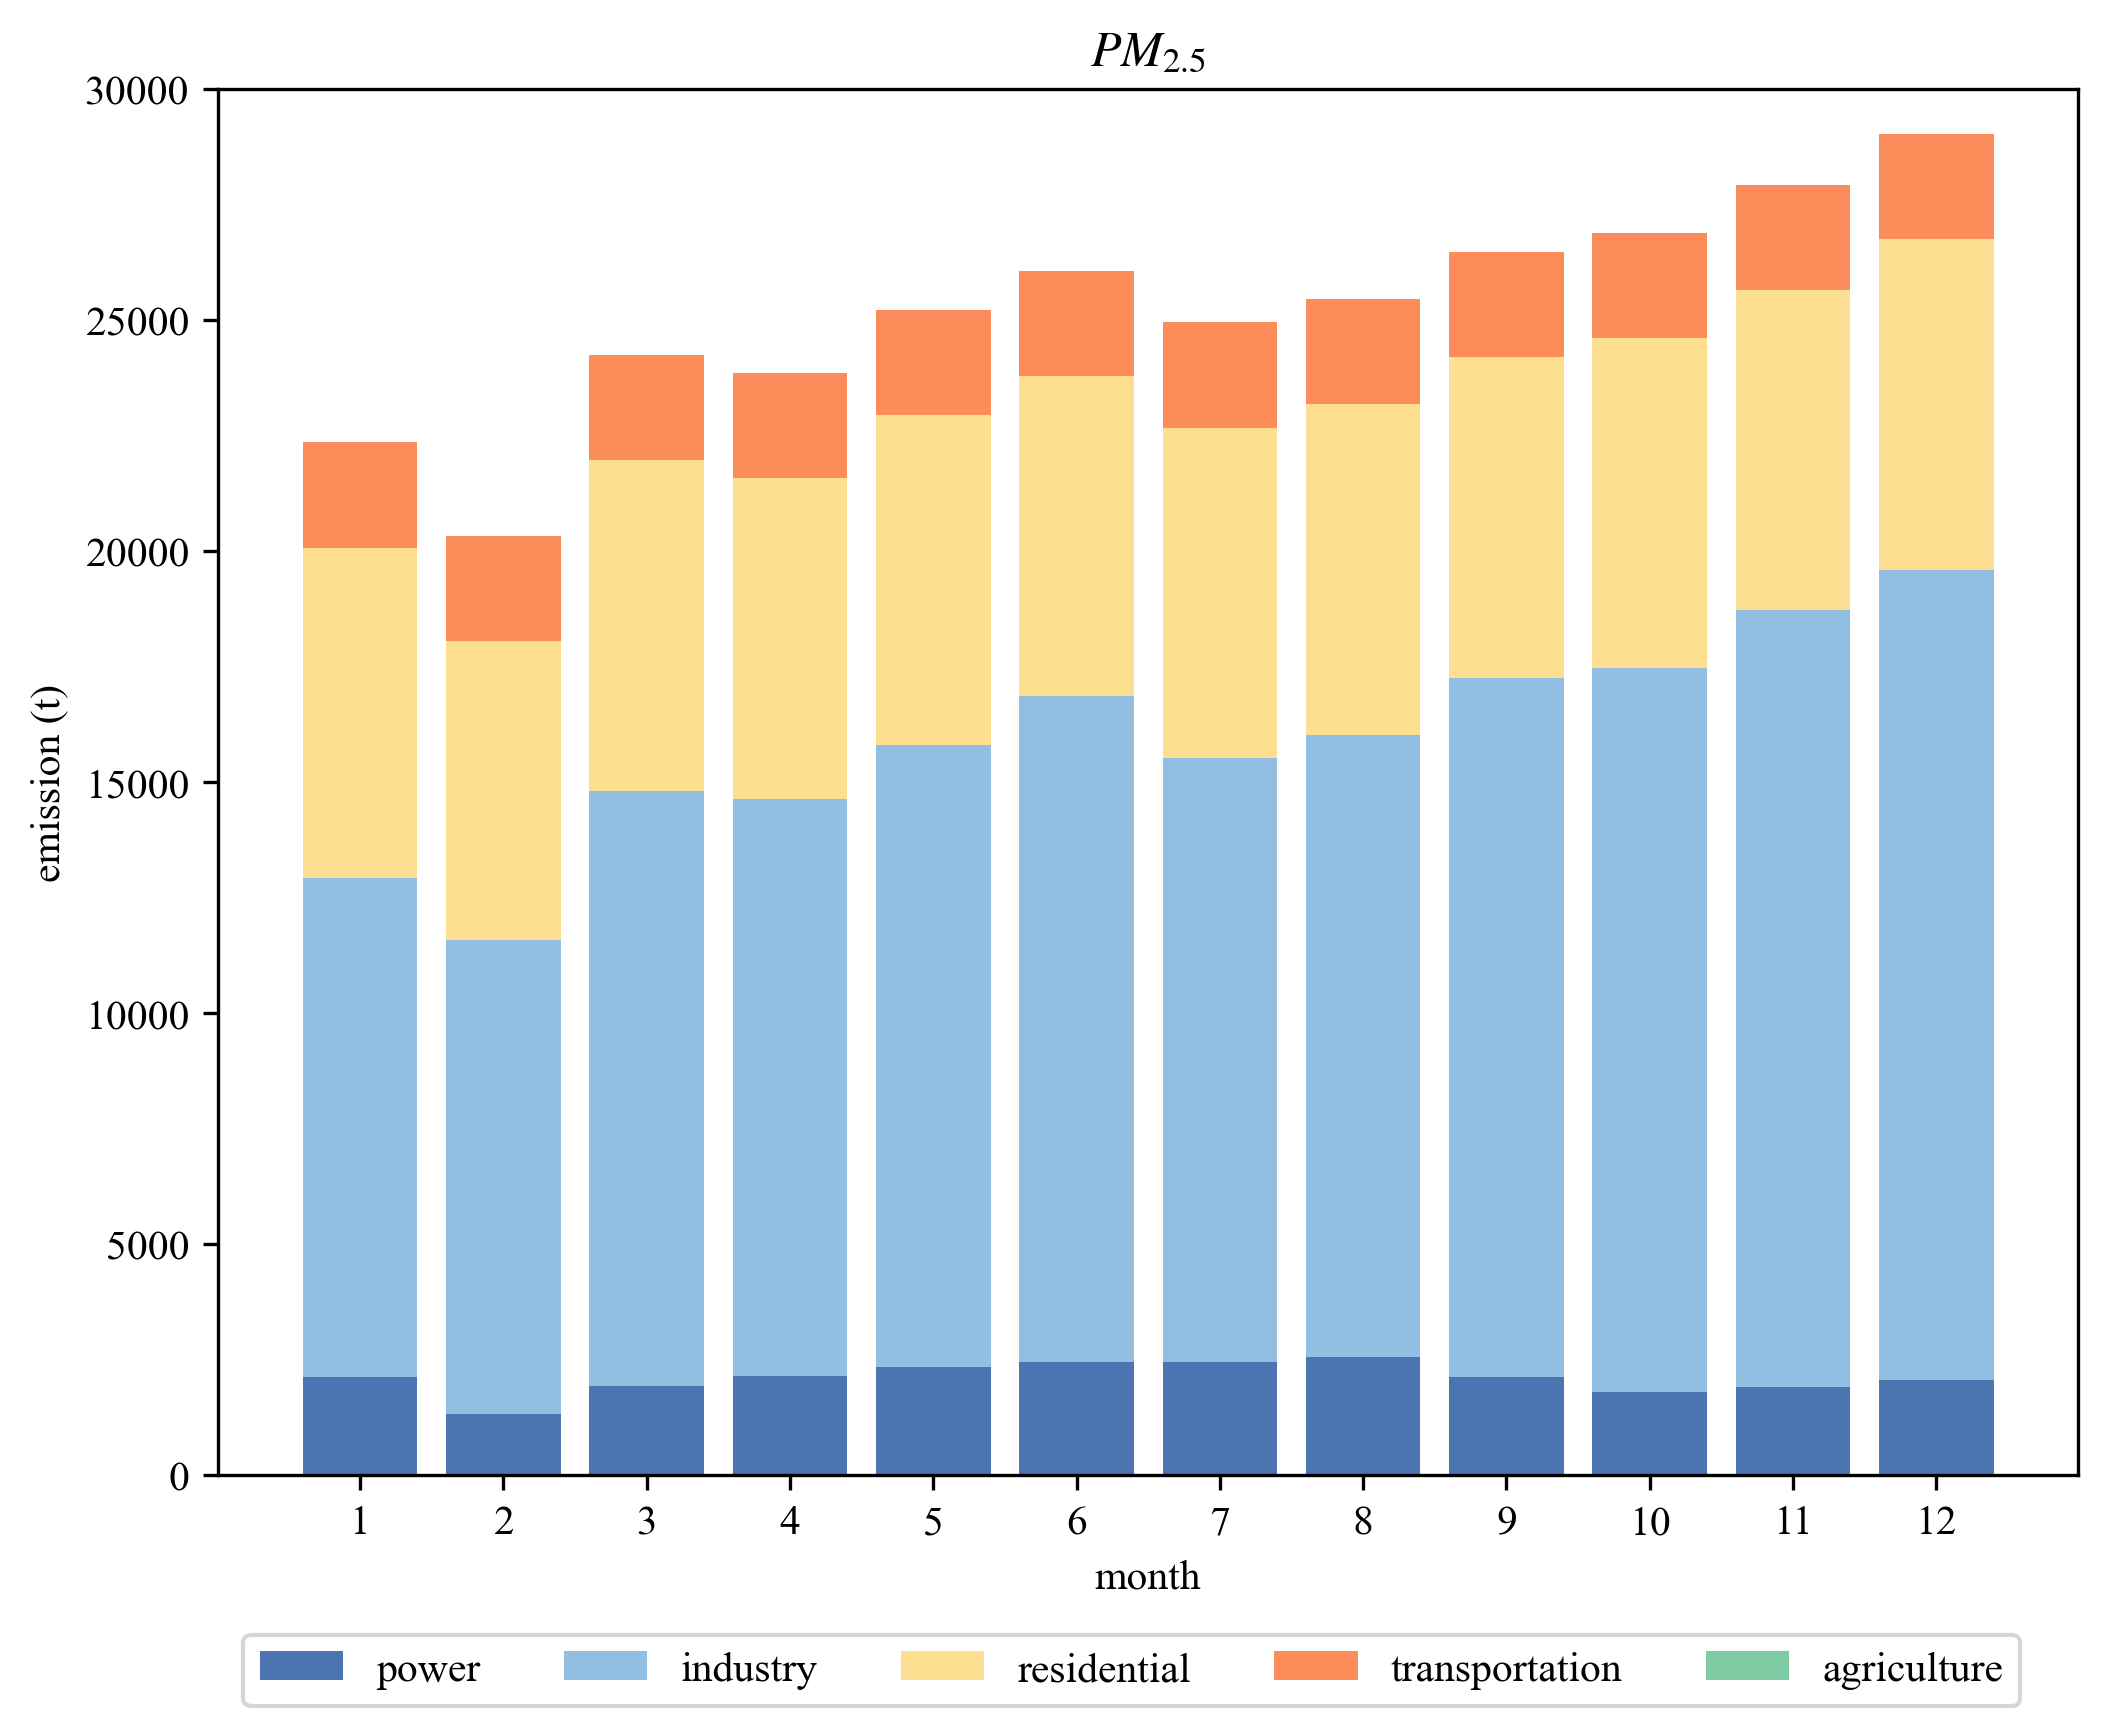

In [100]:
pow=np.array(gp_PM25.get_group('power')['Guangdong'])
ind=np.array(gp_PM25.get_group('industry')['Guangdong'])
res=np.array(gp_PM25.get_group('residential')['Guangdong'])
tra=np.array(gp_PM25.get_group('transportation')['Guangdong'])
agr=np.array(gp_PM25.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,30000)
ax.set_title('$PM_{2.5}$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()

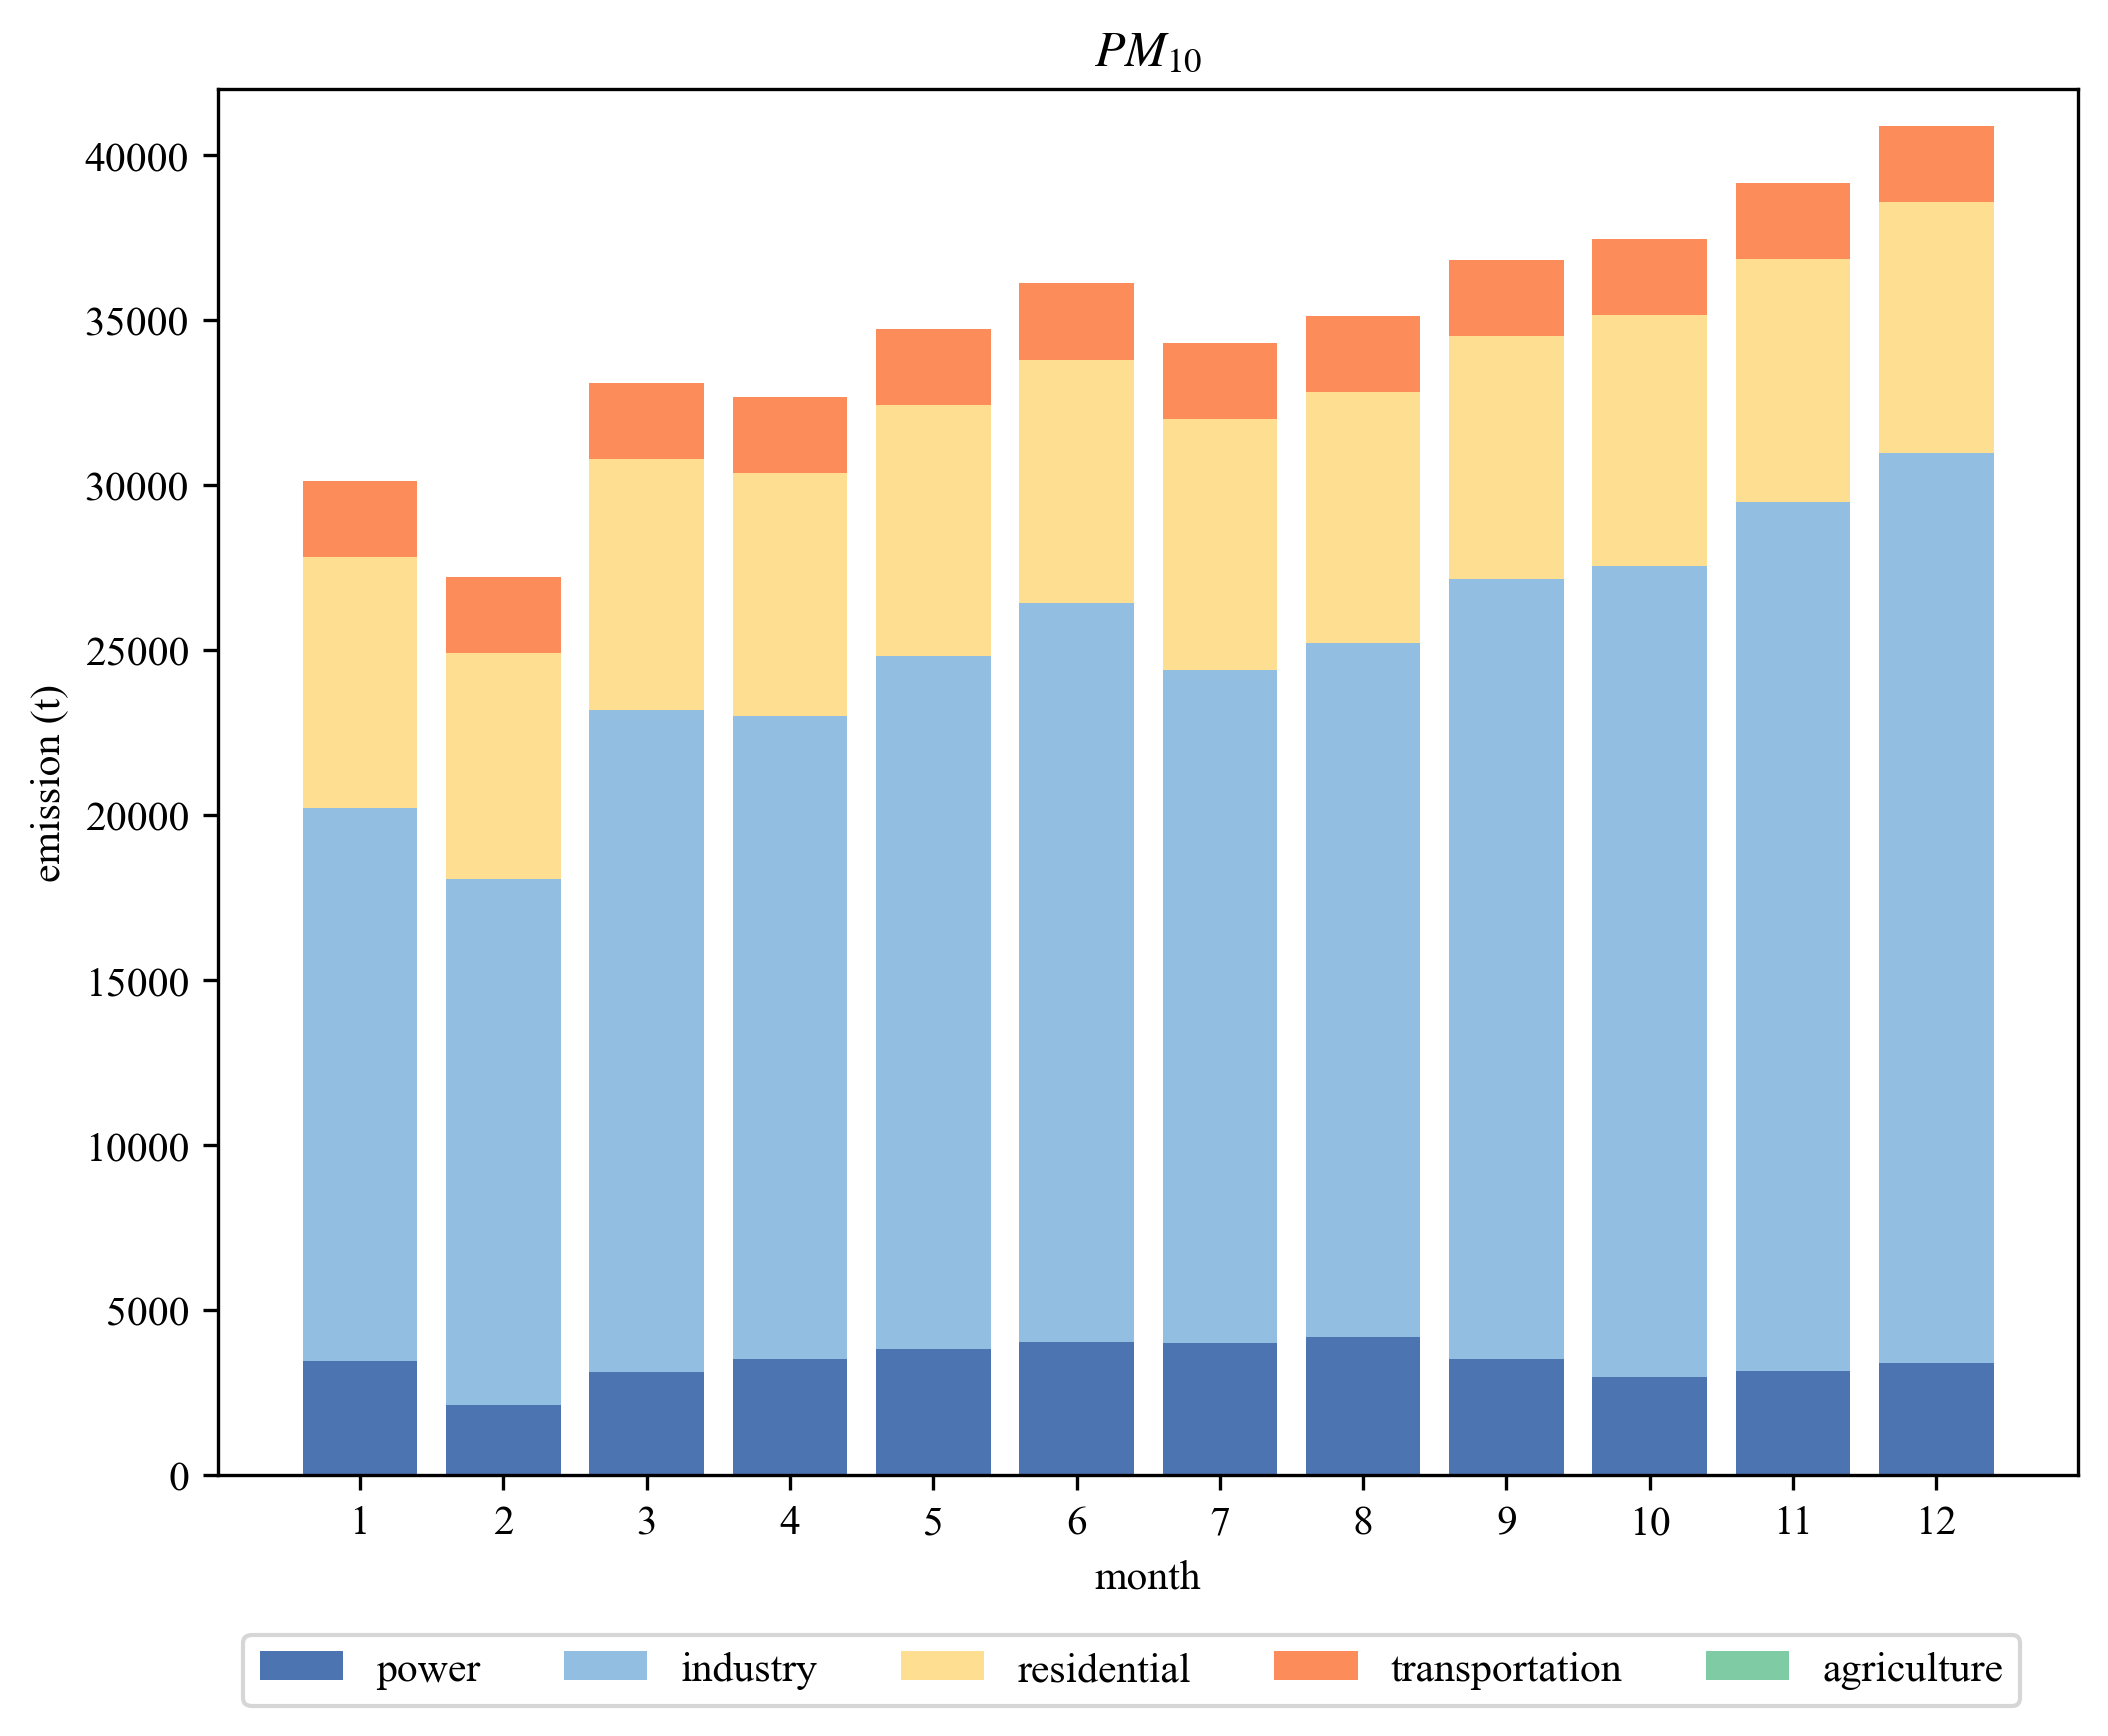

In [102]:
pow=np.array(gp_PM10.get_group('power')['Guangdong'])
ind=np.array(gp_PM10.get_group('industry')['Guangdong'])
res=np.array(gp_PM10.get_group('residential')['Guangdong'])
tra=np.array(gp_PM10.get_group('transportation')['Guangdong'])
agr=np.array(gp_PM10.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,42000)
ax.set_title('$PM_{10}$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()

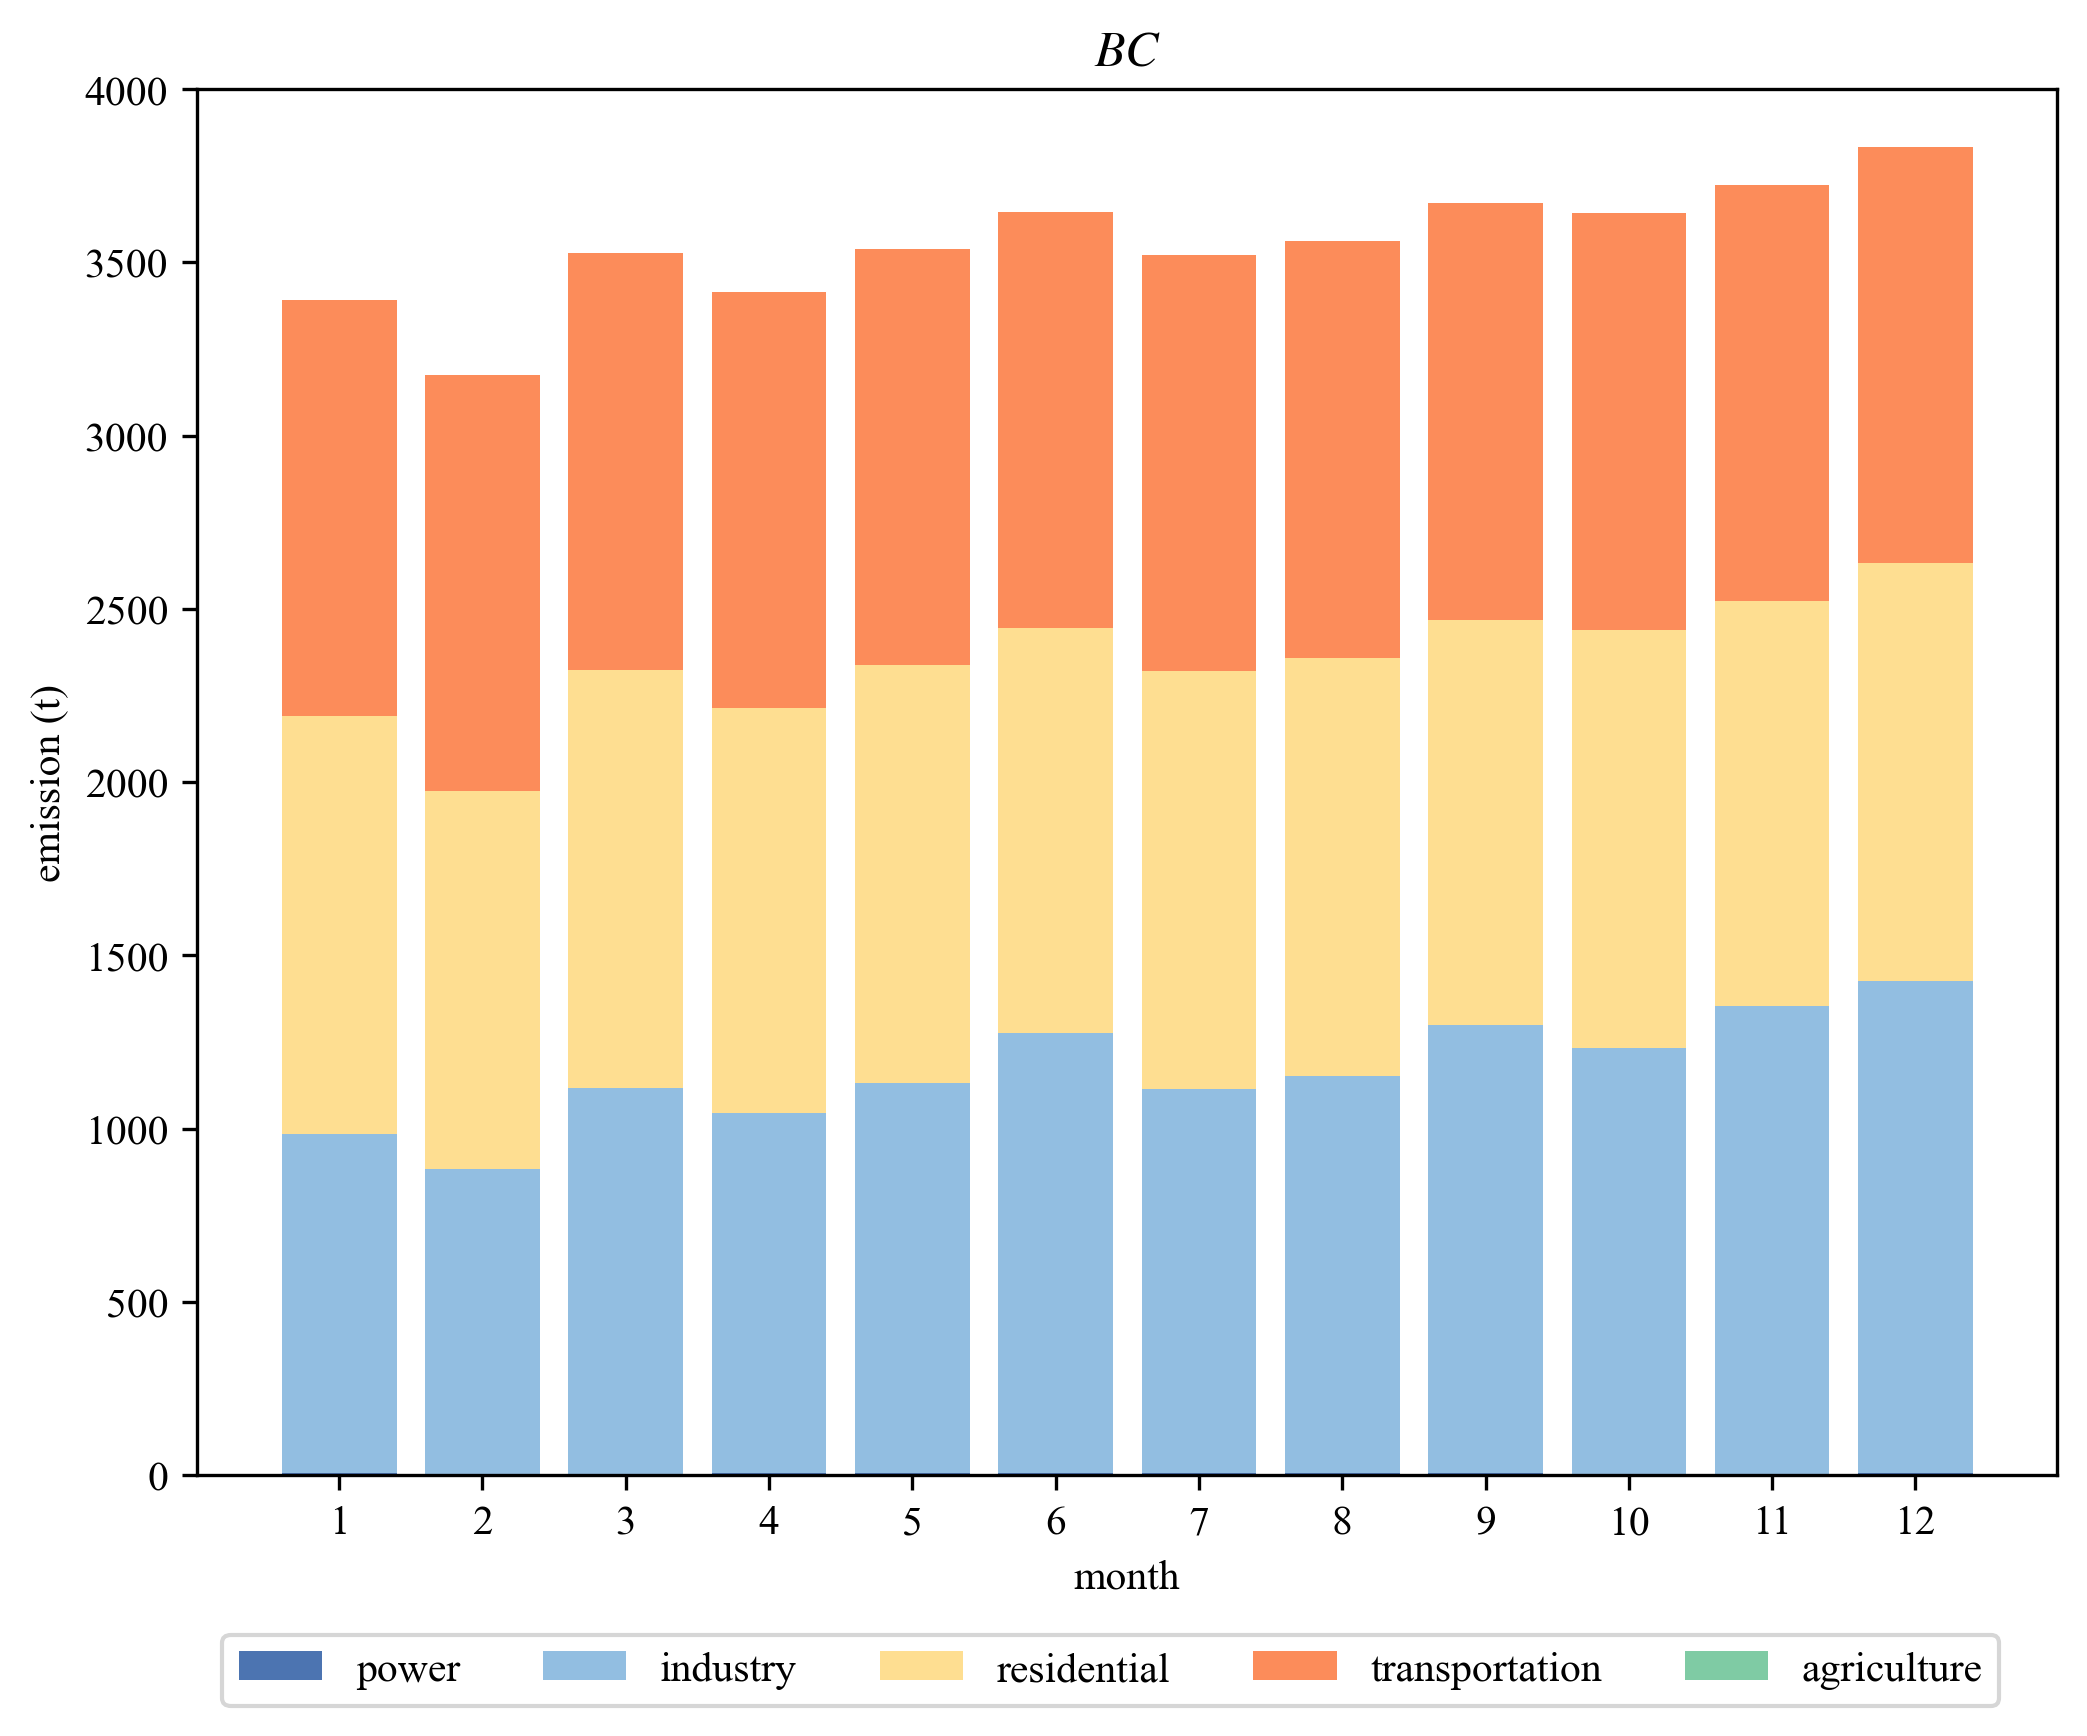

In [104]:
pow=np.array(gp_BC.get_group('power')['Guangdong'])
ind=np.array(gp_BC.get_group('industry')['Guangdong'])
res=np.array(gp_BC.get_group('residential')['Guangdong'])
tra=np.array(gp_BC.get_group('transportation')['Guangdong'])
agr=np.array(gp_BC.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,4000)
ax.set_title('$BC$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()

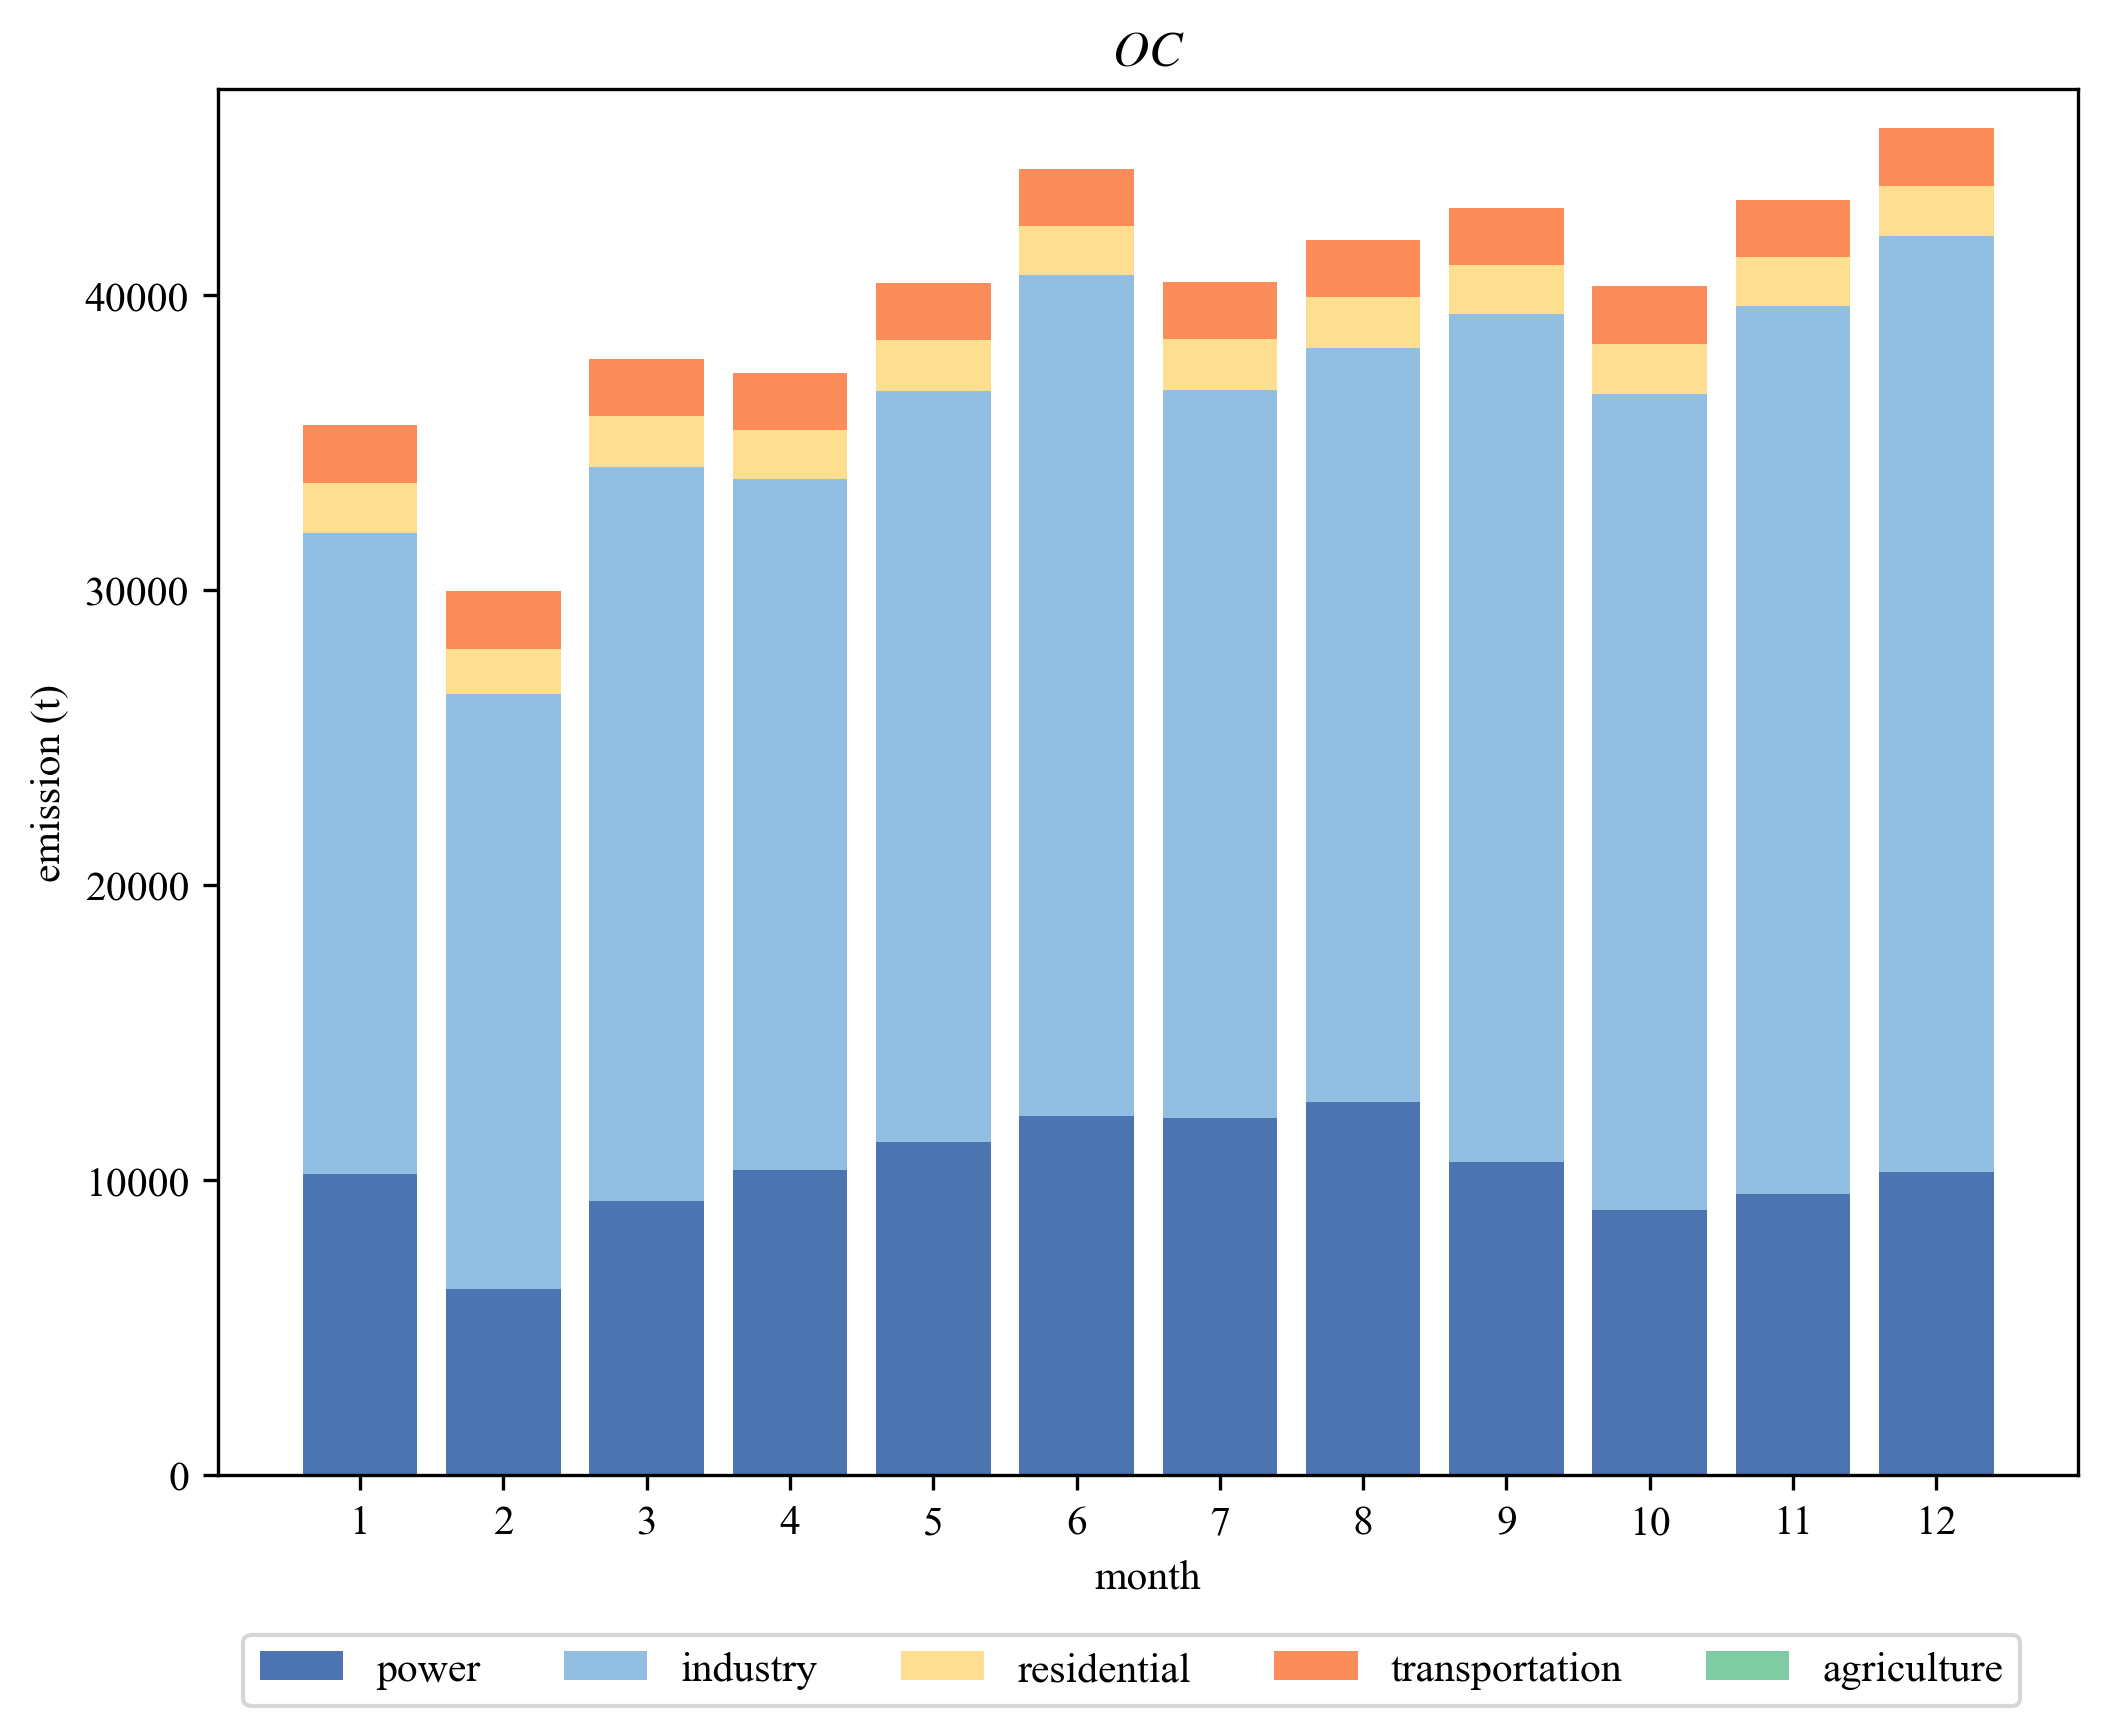

In [109]:
pow=np.array(gp_OC.get_group('power')['Guangdong'])
ind=np.array(gp_OC.get_group('industry')['Guangdong'])
res=np.array(gp_OC.get_group('residential')['Guangdong'])
tra=np.array(gp_OC.get_group('transportation')['Guangdong'])
agr=np.array(gp_OC.get_group('agriculture')['Guangdong'])

fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.subplots(1,1)

mon=np.arange(1,13)
b1=ax.bar(mon,pow,color='#4c74b1',label='power')
b2=ax.bar(mon,ind,color='#92bee1',bottom=pow,label='industry')
b3=ax.bar(mon,res,color='#fede91',bottom=pow+ind,label='residential')
b4=ax.bar(mon,tra,color='#fc8c5a',bottom=pow+ind+res,label='transportation')
b5=ax.bar(mon,agr,color='#7fcba4',bottom=pow+ind+res+tra,label='agriculture')

ax.set_xticks(mon)
ax.set_ylim(0,47000)
ax.set_title('$OC$')
ax.set_xlabel('month')
ax.set_ylabel('emission (t)')

ax.legend(bbox_to_anchor=(0.98,-0.1),ncol=5)

plt.show()